Estudiante: Alvaro Vasquez

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 01. Carga de dataset

In [4]:
df_pulsar = pd.read_csv('Pulsar.csv')
df_pulsar.head()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [4]:
print('El dataframe posee ',df_pulsar.shape[0],' observaciones y ',df_pulsar.shape[1]-1,' variables')

El dataframe posee  17898  observaciones y  8  variables


Tipos de datos

In [5]:
df_pulsar.dtypes

Mean_Integrated         float64
SD                      float64
EK                      float64
Skewness                float64
Mean_DMSNR_Curve        float64
SD_DMSNR_Curve          float64
EK_DMSNR_Curve          float64
Skewness_DMSNR_Curve    float64
Class                     int64
dtype: object

Distribucion del target

<Axes: xlabel='Class', ylabel='count'>

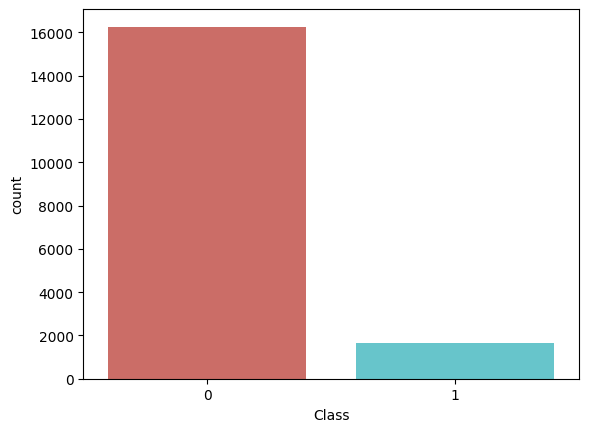

In [6]:
sns.countplot(x='Class', data = df_pulsar, palette = 'hls')

Dividir la data en Train, dev y test

In [7]:
X = df_pulsar.select_dtypes('float64')
y = df_pulsar.Class

In [29]:
# Muestreo de data
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                      stratify = y,
                                                      train_size = 0.7,
                                                      random_state = 202306)


X_watch, X_test, y_watch, y_test = train_test_split(X_valid, y_valid,
                                                    stratify = y_valid,
                                                    test_size= 0.7,
                                                    random_state = 202306)

X_test_opt, X_testmodel, y_test_opt, y_testmodel = train_test_split(X_test, y_test,
                                                    stratify = y_test,
                                                    test_size= 0.6,
                                                    random_state = 202306)

In [30]:
print('Nro observaciones en la data Train: ',X_train.shape[0])
print('Nro observaciones en la data Dev: ',X_watch.shape[0])
print('Nro observaciones en la data Test para optimizar los hiperparametros: ',X_test_opt.shape[0])
print('Nro observaciones en la data Test para medir el performance del modelo: ',X_testmodel.shape[0])

Nro observaciones en la data Train:  12528
Nro observaciones en la data Dev:  1611
Nro observaciones en la data Test para optimizar los hiperparametros:  1503
Nro observaciones en la data Test para medir el performance del modelo:  2256


Se observa que el dataset se encuentra desbalanceado

## 02. Analisis univariado

Funcion para realizar el análisis univariado

In [10]:
def analisis_univariado(df):
  df_univariado = df.describe().T.reset_index().rename(columns={'index':'Variable'})
  df_univariado['FillRate'] = df_univariado['count']/df.shape[0]
  return df_univariado

Estadisticos descriptivos

In [11]:
df_univariado = analisis_univariado(X_train)
df_univariado

,Variable,count,mean,std,min,25%,50%,75%,max,FillRate
0,Mean_Integrated,12528.0,111.212425,25.477032,6.179688,101.031250,115.207031,127.041016,186.023438,1.0
1,SD,12528.0,46.560717,6.821966,24.772042,42.384274,46.966426,51.041745,98.778911,1.0
2,EK,12528.0,0.471256,1.050921,-1.738021,0.027022,0.222056,0.468799,7.595097,1.0
3,Skewness,12528.0,1.737271,6.062145,-1.791886,-0.190033,0.191835,0.920362,65.385974,1.0
4,Mean_DMSNR_Curve,12528.0,12.343129,28.876727,0.213211,1.920569,2.804348,5.482651,222.421405,1.0
5,SD_DMSNR_Curve,12528.0,26.256806,19.329459,7.370432,14.436030,18.470554,28.470372,110.642211,1.0
6,EK_DMSNR_Curve,12528.0,8.315590,4.485765,-3.139270,5.784886,8.438930,10.694815,34.539844,1.0
7,Skewness_DMSNR_Curve,12528.0,104.793512,105.965247,-1.976976,34.783767,83.056155,139.302840,1191.000837,1.0


Principales conclusiones:
- El dataframe no posee valores missing.
- El dataframe solo posee variables numericas
- Posiblemente existan valores outliers

In [12]:
def grafica_hist(df):
  vars = df.columns.to_list()
  for i in vars:
    plt.figure(figsize=(3,3))
    sns.histplot(df[i])
    plt.show()

In [13]:
def grafica_box(df):
  vars = df.columns.to_list()
  for i in vars:
    plt.figure(figsize=(3,3))
    sns.boxplot(df[i])
    plt.show()

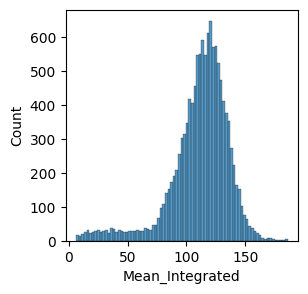

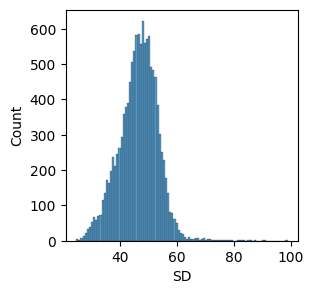

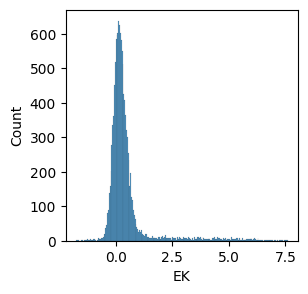

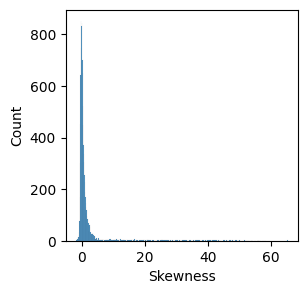

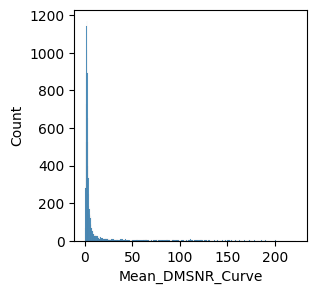

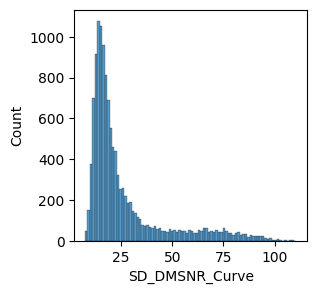

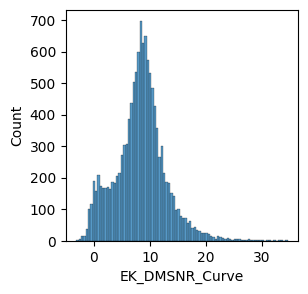

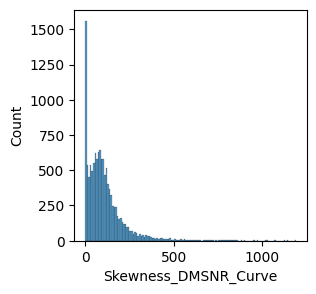

In [14]:
grafica_hist(X_train)

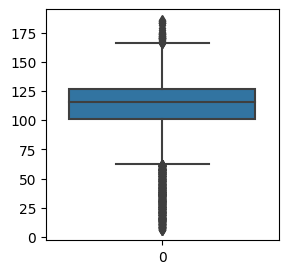

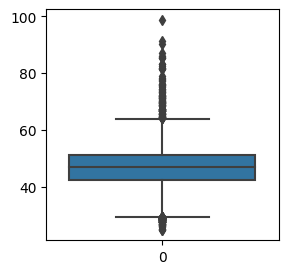

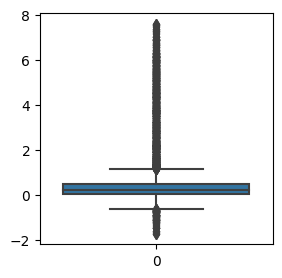

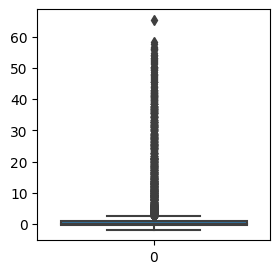

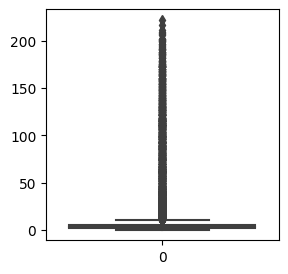

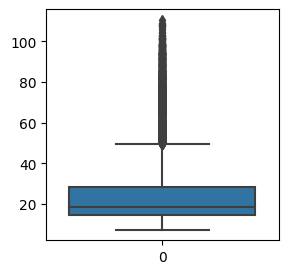

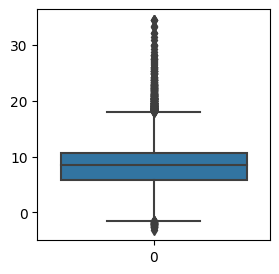

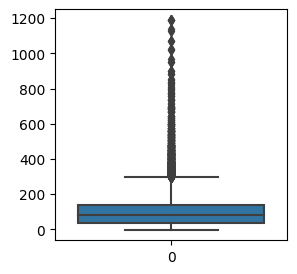

In [15]:
grafica_box(X_train)

Calculo del  nivel de discriminacion (GINI) de cada variable

In [16]:
features = X_train.columns.to_list()

In [17]:
import sklearn
ginis = [sklearn.metrics.roc_auc_score(y_train, X_train[col])*2-1 for col in features]

In [18]:
df_ginis = pd.DataFrame({'Variable' : features,
                          'Gini' : ginis})
df_ginis

,Variable,Gini
0,Mean_Integrated,-0.896914
1,SD,-0.626659
2,EK,0.944329
3,Skewness,0.881545
4,Mean_DMSNR_Curve,0.776537
5,SD_DMSNR_Curve,0.782066
6,EK_DMSNR_Curve,-0.759536
7,Skewness_DMSNR_Curve,-0.764411


In [19]:
df_univariado_final = pd.merge(df_univariado,df_ginis,how='left',on='Variable')
df_univariado_final

,Variable,count,mean,std,min,25%,50%,75%,max,FillRate,Gini
0,Mean_Integrated,12528.0,111.212425,25.477032,6.179688,101.031250,115.207031,127.041016,186.023438,1.0,-0.896914
1,SD,12528.0,46.560717,6.821966,24.772042,42.384274,46.966426,51.041745,98.778911,1.0,-0.626659
2,EK,12528.0,0.471256,1.050921,-1.738021,0.027022,0.222056,0.468799,7.595097,1.0,0.944329
3,Skewness,12528.0,1.737271,6.062145,-1.791886,-0.190033,0.191835,0.920362,65.385974,1.0,0.881545
4,Mean_DMSNR_Curve,12528.0,12.343129,28.876727,0.213211,1.920569,2.804348,5.482651,222.421405,1.0,0.776537
5,SD_DMSNR_Curve,12528.0,26.256806,19.329459,7.370432,14.436030,18.470554,28.470372,110.642211,1.0,0.782066
6,EK_DMSNR_Curve,12528.0,8.315590,4.485765,-3.139270,5.784886,8.438930,10.694815,34.539844,1.0,-0.759536
7,Skewness_DMSNR_Curve,12528.0,104.793512,105.965247,-1.976976,34.783767,83.056155,139.302840,1191.000837,1.0,-0.764411


Se observa que todas las variables tienen un buen nivel de discriminacion, lo que indica que todas las variables entrarian para un primer entrenamiento

## 03. Analisis bivariado - seleccion de variables

In [20]:
!pip install scorecardpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scorecardpy: filename=scorecardpy-0.1.9.6-py3-none-any.whl size=60626 sha256=a781916db9fda62c1775fe652e3a4b3232f09e401aff0fc35ea1964fcb6cd898
  Stored in directory: /root/.cache/pip/wheels/85/8d/c1/c6b0f6bd9a866235769bda17737fa70d1189e633d81114c594
Successfully built scorecardpy


In [21]:
import scorecardpy as sc

In [22]:
df_train = pd.concat([X_train,y_train],axis = 1)
df_train.head()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
15792,99.335938,48.797938,0.327663,-0.100266,3.415552,19.897532,7.119518,58.844629,0
4101,128.132812,47.327874,0.297771,0.210071,6.716555,34.377319,5.168086,25.732111,0
4893,143.921875,51.065156,-0.021782,-0.110498,8.905518,38.271870,4.535310,20.030672,0
14745,103.437500,51.862160,0.734445,0.517248,24.586957,63.154281,2.306972,3.599275,0
10399,118.531250,53.404403,0.050607,-0.444129,1.466555,12.837864,11.955144,175.446116,0


[INFO] creating woe binning ...
Binning on 12528 rows and 9 columns in 00:00:19


{'SD': <Figure size 640x480 with 2 Axes>,
 'Mean_DMSNR_Curve': <Figure size 640x480 with 2 Axes>,
 'Skewness': <Figure size 640x480 with 2 Axes>,
 'Skewness_DMSNR_Curve': <Figure size 640x480 with 2 Axes>,
 'SD_DMSNR_Curve': <Figure size 640x480 with 2 Axes>,
 'Mean_Integrated': <Figure size 640x480 with 2 Axes>,
 'EK': <Figure size 640x480 with 2 Axes>,
 'EK_DMSNR_Curve': <Figure size 640x480 with 2 Axes>}

<Figure size 500x300 with 0 Axes>

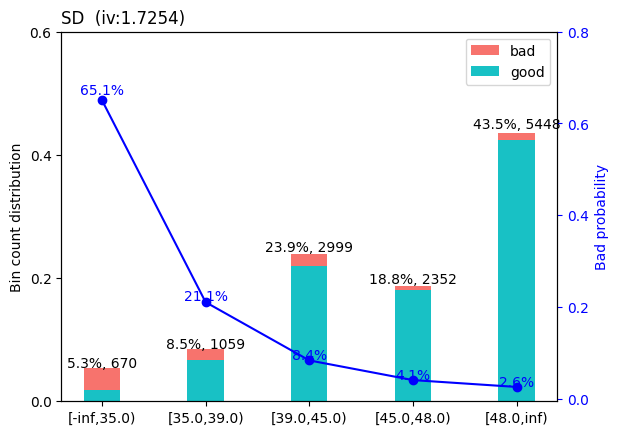

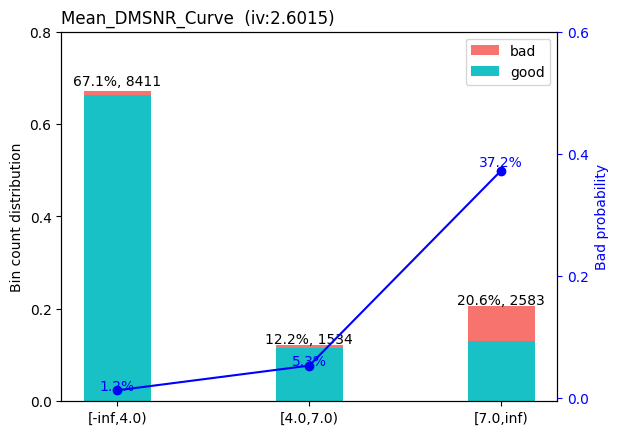

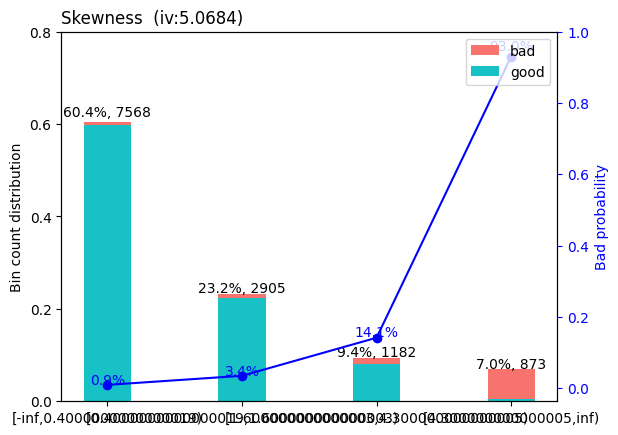

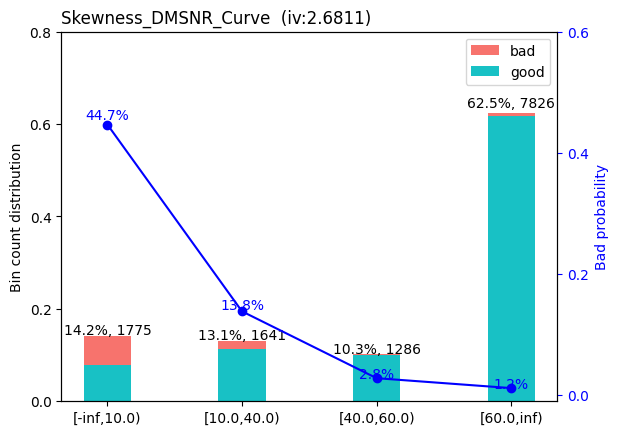

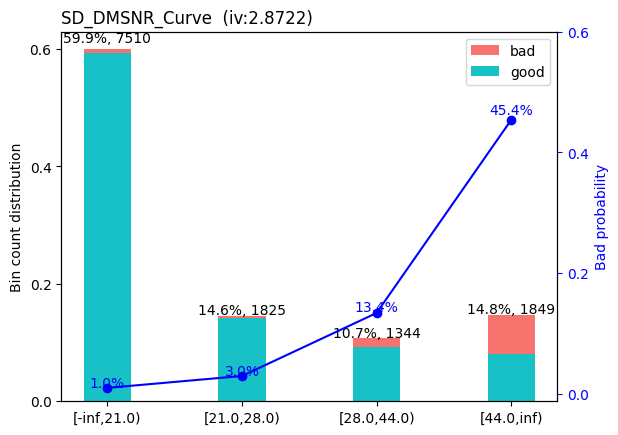

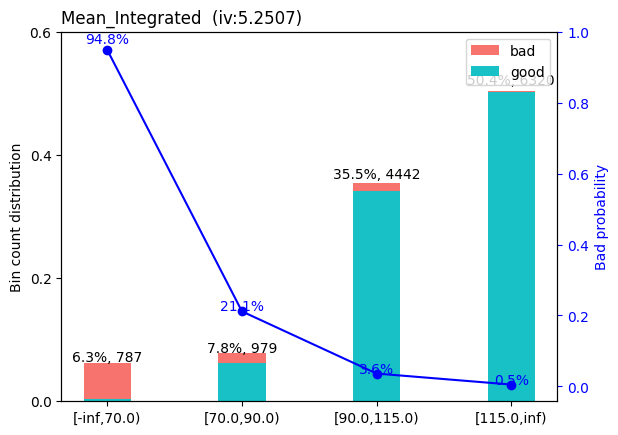

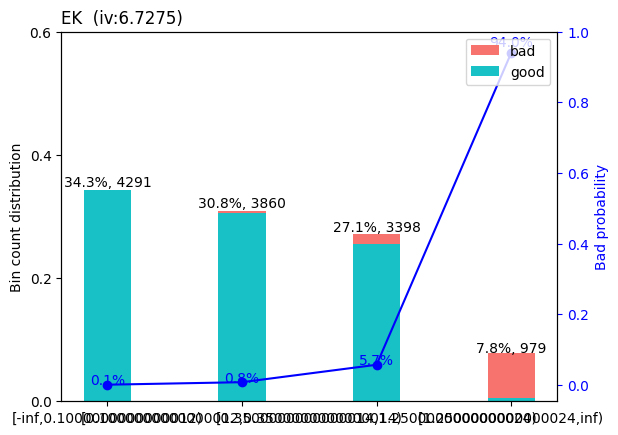

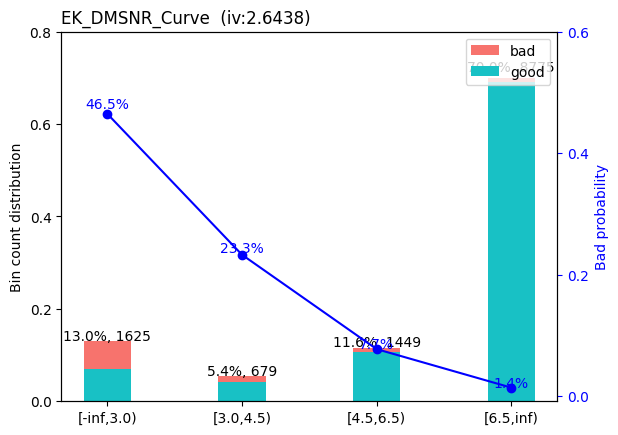

In [23]:
bins = sc.woebin(df_train, y = 'Class')
plt.figure(figsize = (5,3))
sc.woebin_plot(bins)

Este analisis bivariado nos confirma lo que el nivel de discriminacion (GINI) de cada variable nos habia indicado, ya que se observa que hay un sentido marcado del ratio del target creciente/decrecientee segun la variable independiente aumenta o disminuya, por lo que se concluye que todas las variables son importantes al momento de entrenar un primer modelo

## 04. Normalizador de variables independientes

In [24]:
from sklearn.preprocessing import StandardScaler

In [73]:
def normalizarData(X):
  scaler_zscore = StandardScaler()
  X_normalized = scaler_zscore.fit_transform(X)
  X_normalized = pd.DataFrame(X_normalized,columns = X.columns)
  return X_normalized,scaler_zscore

In [74]:
df_xtrain_normalized,scaler = normalizarData(X_train)
df_xtrain_normalized.head()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve
0,-0.466183,0.327957,-0.136641,-0.303129,-0.309174,-0.329007,-0.266648,-0.433640
1,0.664169,0.112459,-0.165086,-0.251934,-0.194856,0.420127,-0.701693,-0.746137
2,1.283931,0.660311,-0.469168,-0.304817,-0.119049,0.621618,-0.842762,-0.799944
3,-0.305186,0.777145,0.250446,-0.201261,0.424020,1.908949,-1.339539,-0.955014
4,0.287283,1.003224,-0.400284,-0.359854,-0.376670,-0.694250,0.811389,0.666779


## 05. Preparacion de data X_watch, X_test_opt y X_testmodel

In [39]:
df_xtest_opt_normalized,scaler = normalizarData(X_test_opt)
df_xtest_opt_normalized.head()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve
0,1.287280,0.352862,-0.617330,-0.297588,-0.340700,-0.614336,0.193552,0.096413
1,0.046892,-0.184605,-0.362616,-0.275864,-0.181040,0.151670,-0.785315,-0.749217
2,0.615648,1.159128,-0.265808,-0.320548,-0.346952,-0.447682,0.493314,0.180399
3,0.076285,-1.635126,-0.164078,-0.011089,-0.324632,-0.444886,0.107206,-0.086784
4,0.933093,0.864988,-0.519777,-0.318199,-0.194619,0.362789,-0.683669,-0.724721


In [40]:
df_xtestmodel_normalized,scaler = normalizarData(X_testmodel)
df_xtestmodel_normalized.head()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve
0,-3.274515,-1.423858,3.626784,2.913340,2.453169,1.949372,-1.717154,-0.974648
1,0.229346,-0.114712,-0.519704,-0.322766,0.738382,1.673118,-1.481494,-0.962749
2,1.342079,-0.358987,-0.549263,-0.280749,-0.348574,-0.366321,0.148887,-0.159942
3,0.771432,1.315503,-0.465335,-0.391533,-0.359851,-0.625969,0.425565,0.293096
4,-0.167521,-0.226231,-0.030108,-0.256868,-0.298118,0.056074,-0.252278,-0.494691


In [41]:
df_xwatch_normalized,scaler = normalizarData(X_watch)
df_xwatch_normalized.head()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve
0,-0.835313,-0.316655,0.048951,-0.199596,-0.260621,-0.238967,-0.663767,-0.658134
1,0.604383,1.474079,-0.621345,-0.316605,-0.157589,0.448264,-0.857401,-0.798414
2,0.730779,0.871451,-0.472427,-0.312940,-0.351458,-0.499851,0.004199,-0.212483
3,0.740220,-0.322287,-0.164569,-0.252560,-0.385354,-0.605239,0.666081,0.345616
4,0.708241,0.371450,-0.427956,-0.311053,-0.371946,-0.583294,0.529150,0.277737


## 05. Entrenamiento de modelo base XGBoost

In [42]:
from xgboost import XGBClassifier

In [43]:
xgb_model = XGBClassifier(n_estimators = 3000,
                          seed = 202306,
                          nthread = 6,
                          objective = 'binary:logistic',
                          eval_metric = 'logloss',
                          learning_rate = 0.3,
                          max_depth = 6,
                          gamma = 3,
                          reg_alpha = 3,
                          reg_lambda = 3,
                          subsample = 1,
                          colsample_bytree = 1)
xgb_model.fit(df_xtrain_normalized,y_train,eval_set=[(df_xwatch_normalized,y_watch)],early_stopping_rounds=10)

[0]	validation_0-logloss:0.45873
[1]	validation_0-logloss:0.32790
[2]	validation_0-logloss:0.24759
[3]	validation_0-logloss:0.19351
[4]	validation_0-logloss:0.15633
[5]	validation_0-logloss:0.13031
[6]	validation_0-logloss:0.11224


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-logloss:0.09874
[8]	validation_0-logloss:0.08924
[9]	validation_0-logloss:0.08341
[10]	validation_0-logloss:0.07925
[11]	validation_0-logloss:0.07664
[12]	validation_0-logloss:0.07442
[13]	validation_0-logloss:0.07265
[14]	validation_0-logloss:0.07147
[15]	validation_0-logloss:0.07074
[16]	validation_0-logloss:0.07015
[17]	validation_0-logloss:0.06959
[18]	validation_0-logloss:0.06948
[19]	validation_0-logloss:0.06917
[20]	validation_0-logloss:0.06908
[21]	validation_0-logloss:0.06879
[22]	validation_0-logloss:0.06881
[23]	validation_0-logloss:0.06882
[24]	validation_0-logloss:0.06883
[25]	validation_0-logloss:0.06884
[26]	validation_0-logloss:0.06885
[27]	validation_0-logloss:0.06885
[28]	validation_0-logloss:0.06885
[29]	validation_0-logloss:0.06885
[30]	validation_0-logloss:0.06886
[31]	validation_0-logloss:0.06886


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=3, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=3000, n_jobs=None, nthread=6, num_parallel_tree=None,
              predictor=None, ...)

In [44]:
from sklearn.metrics import roc_auc_score

In [62]:
def calculoPerformance(X,y,modelo,tipo_base):
  y_pred_proba = modelo.predict_proba(X)
  auc = roc_auc_score(y,y_pred_proba[:,1])
  print('Gini ',tipo_base, ': ',2*auc-1)

In [63]:
calculoPerformance(df_xtrain_normalized,y_train,xgb_model,'Train')
calculoPerformance(df_xwatch_normalized,y_watch,xgb_model,'Dev')
calculoPerformance(df_xtest_opt_normalized,y_test_opt,xgb_model,'Test hiperparametros')
calculoPerformance(df_xtestmodel_normalized,y_testmodel,xgb_model,'Test modelo')

Gini  Train :  0.9720515700658041
Gini  Dev :  0.950222608117345
Gini  Test hiperparametros :  0.9466050857355204
Gini  Test modelo :  0.9639924224484964


Importancia de variables para el modelo XGBoost

In [53]:
importances = pd.DataFrame(data={'Variable':df_xtrain_normalized.columns,
                                 'Gain': xgb_model.feature_importances_})

importances = importances.sort_values(by='Gain',ascending=False)
importances['Gain_acumulado'] = importances['Gain'].cumsum()
importances

,Variable,Gain,Gain_acumulado
2,EK,0.736126,0.736126
5,SD_DMSNR_Curve,0.057888,0.794014
3,Skewness,0.055576,0.849590
7,Skewness_DMSNR_Curve,0.049152,0.898742
1,SD,0.029345,0.928088
0,Mean_Integrated,0.024832,0.952919
4,Mean_DMSNR_Curve,0.023662,0.976581
6,EK_DMSNR_Curve,0.023419,1.000000


## 06. Analisis multivariado

<Axes: >

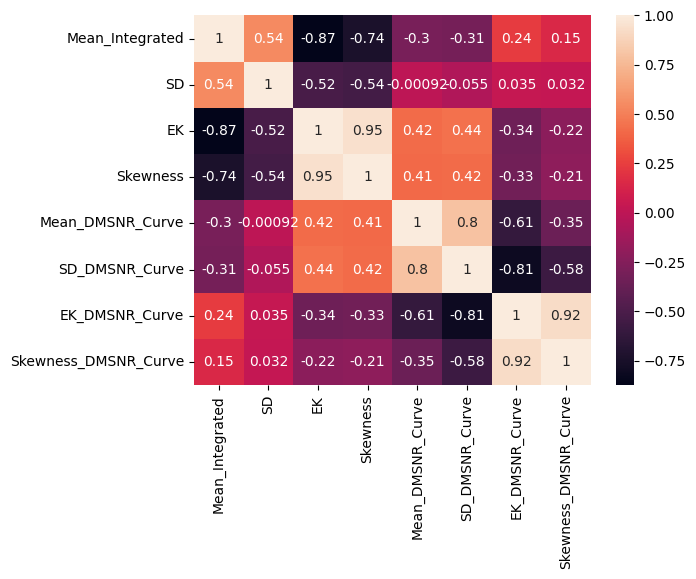

In [55]:
sns.heatmap(df_xtrain_normalized.corr(),annot = True)

Variables correlacionadas:
- EK (Gini: 0.944329 | Gain:0.736126) - Mean_Integrated (Gini: 0.896914 | Gain: 0.024832)
- Skewness (Gini: 0.881545 | Gain: 0.055576) - Mean_Integrated (Gini: 0.896914 | Gain: 0.024832)
- Skewness (Gini: 0.881545 | Gain: 0.055576) - EK (Gini: 0.944329 | Gain:0.736126)
- EK_DMSNR_Curve (Gini: 0.759536 | Gain: 0.023419) - SD_DMSNR_Curve (Gini: 0.782066 | Gain: 0.057888)
- EK_DMSNR_Curve (Gini: 0.759536 | Gain: 0.023419) - Skwness_DMSNR_Curve (Gini: 0.764411 | Gain: 0.049152)

Variables a Eliminar por correlaciones:
Mean_Integrated , Skewness, EK_DMSNR_Curve,

In [57]:
def eliminarColumns(df,list_drop_vars):
  df2 = df.drop(list_drop_vars, axis = 1)
  return df2

In [58]:
df_xtrain_normalized2     = eliminarColumns(df_xtrain_normalized,['Mean_Integrated' , 'Skewness', 'EK_DMSNR_Curve'])
df_xwatch_normalized2     = eliminarColumns(df_xwatch_normalized,['Mean_Integrated' , 'Skewness', 'EK_DMSNR_Curve'])
df_xtest_opt_normalized2  = eliminarColumns(df_xtest_opt_normalized,['Mean_Integrated' , 'Skewness', 'EK_DMSNR_Curve'])
df_xtestmodel_normalized2 = eliminarColumns(df_xtestmodel_normalized,['Mean_Integrated' , 'Skewness', 'EK_DMSNR_Curve'])

## 07. Entrenamiento modelo post analisis de correlaciones

In [60]:
xgb_model2 = XGBClassifier(n_estimators = 3000,
                          seed = 202306,
                          nthread = 6,
                          objective = 'binary:logistic',
                          eval_metric = 'logloss',
                          learning_rate = 0.3,
                          max_depth = 6,
                          gamma = 3,
                          reg_alpha = 3,
                          reg_lambda = 3,
                          subsample = 1,
                          colsample_bytree = 1)
xgb_model2.fit(df_xtrain_normalized2,y_train,eval_set=[(df_xwatch_normalized2,y_watch)],early_stopping_rounds=10)

[0]	validation_0-logloss:0.45839
[1]	validation_0-logloss:0.32754
[2]	validation_0-logloss:0.24619
[3]	validation_0-logloss:0.19170
[4]	validation_0-logloss:0.15503
[5]	validation_0-logloss:0.12901


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-logloss:0.11095
[7]	validation_0-logloss:0.09831
[8]	validation_0-logloss:0.08905
[9]	validation_0-logloss:0.08278
[10]	validation_0-logloss:0.07864
[11]	validation_0-logloss:0.07554
[12]	validation_0-logloss:0.07366
[13]	validation_0-logloss:0.07218
[14]	validation_0-logloss:0.07118
[15]	validation_0-logloss:0.07048
[16]	validation_0-logloss:0.06989
[17]	validation_0-logloss:0.06932
[18]	validation_0-logloss:0.06897
[19]	validation_0-logloss:0.06892
[20]	validation_0-logloss:0.06854
[21]	validation_0-logloss:0.06856
[22]	validation_0-logloss:0.06858
[23]	validation_0-logloss:0.06859
[24]	validation_0-logloss:0.06860
[25]	validation_0-logloss:0.06860
[26]	validation_0-logloss:0.06861
[27]	validation_0-logloss:0.06861
[28]	validation_0-logloss:0.06861
[29]	validation_0-logloss:0.06861
[30]	validation_0-logloss:0.06861


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=3, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=3000, n_jobs=None, nthread=6, num_parallel_tree=None,
              predictor=None, ...)

In [64]:
calculoPerformance(df_xtrain_normalized2,y_train,xgb_model2,'Train')
calculoPerformance(df_xwatch_normalized2,y_watch,xgb_model2,'Dev')
calculoPerformance(df_xtest_opt_normalized2,y_test_opt,xgb_model2,'Test hiperparametros')
calculoPerformance(df_xtestmodel_normalized2,y_testmodel,xgb_model2,'Test modelo')

Gini  Train :  0.9708642717902634
Gini  Dev :  0.9514788198998727
Gini  Test hiperparametros :  0.9498752455274193
Gini  Test modelo :  0.9674283684584417


## 08. Optimización de hiperparámetros

In [65]:
paramGrid = {'objective':['binary:logistic'],
              'max_depth':[3,4,5,6,7,8,9],
             'learning_rate':[0.018,0.032,0.056,0.01,0.02,0.05,0.08,0.1,0.15,0.5,0.8],
             'seed': [20221230],
             'subsample':[0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1],
             'colsample_bytree':[0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1],
             'reg_alpha':[1,2,3,4,5,10,15,20,35],
             'reg_lambda':[1,2,3,4,5,6,7,8],
             'gamma':[1,2,3,4,5,6,7,8]}

In [66]:
import random
import time

start_time = time.time()
pdResults = pd.DataFrame()

for i in range(100):
  print("****** Iteration : " + str(i))
  param = {}

  for paramName, paramValue in paramGrid.items():
    param[paramName] = random.choice(paramValue)

  param['eval_metric' ] = 'logloss'
  n_rounds = 3000

  xgb_model = XGBClassifier(objective = param['objective'],
                            max_depth = param['max_depth'],
                            learning_rate = param['learning_rate'],
                            seed = param['seed'],
                            subsample = param['subsample'],
                            colsample_bytree = param['colsample_bytree'],
                            gamma = param['gamma'],
                            reg_lambda = param['reg_lambda'],
                            reg_alpha = param['reg_alpha'],
                            eval_metric = param['eval_metric'],
                            n_estimators = n_rounds)

  xgb_model.fit(df_xtrain_normalized2,y_train,eval_set=[(df_xwatch_normalized2,y_watch)],early_stopping_rounds = 30)
  best_tree = xgb_model.get_booster().best_ntree_limit
  param['best_tree'] = best_tree

  y_train_pred = xgb_model.predict_proba(df_xtrain_normalized2)
  y_test_pred = xgb_model.predict_proba(df_xtest_opt_normalized2)

  giniTrain = (roc_auc_score(y_train,y_train_pred[:,1]))*2-1
  giniTest = (roc_auc_score(y_test_opt,y_test_pred[:,1]))*2-1

  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
                                             'paramName': list(param.keys()),
                                             'paramValue': list(param.values()),
                                             'giniTrain' : giniTrain,
                                             'giniTest' : giniTest}))

print('....%s seconds ---' %   ((time.time() - start_time)))

****** Iteration : 0
[0]	validation_0-logloss:0.67533
[1]	validation_0-logloss:0.65825
[2]	validation_0-logloss:0.64347
[3]	validation_0-logloss:0.62758
[4]	validation_0-logloss:0.61227
[5]	validation_0-logloss:0.59905
[6]	validation_0-logloss:0.58712
[7]	validation_0-logloss:0.57332


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-logloss:0.56126
[9]	validation_0-logloss:0.54971
[10]	validation_0-logloss:0.53715
[11]	validation_0-logloss:0.52639
[12]	validation_0-logloss:0.51459
[13]	validation_0-logloss:0.50452
[14]	validation_0-logloss:0.49550
[15]	validation_0-logloss:0.48471
[16]	validation_0-logloss:0.47429
[17]	validation_0-logloss:0.46418
[18]	validation_0-logloss:0.45439
[19]	validation_0-logloss:0.44496
[20]	validation_0-logloss:0.43750
[21]	validation_0-logloss:0.43023
[22]	validation_0-logloss:0.42314
[23]	validation_0-logloss:0.41566
[24]	validation_0-logloss:0.40733
[25]	validation_0-logloss:0.39925
[26]	validation_0-logloss:0.39137
[27]	validation_0-logloss:0.38373
[28]	validation_0-logloss:0.37637
[29]	validation_0-logloss:0.37066
[30]	validation_0-logloss:0.36521
[31]	validation_0-logloss:0.35934
[32]	validation_0-logloss:0.35363
[33]	validation_0-logloss:0.34848
[34]	validation_0-logloss:0.34306
[35]	validation_0-logloss:0.33677
[36]	validation_0-logloss:0.33066
[37]	validation_

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-logloss:0.30734
[15]	validation_0-logloss:0.29167
[16]	validation_0-logloss:0.28160
[17]	validation_0-logloss:0.27225
[18]	validation_0-logloss:0.25908
[19]	validation_0-logloss:0.24689
[20]	validation_0-logloss:0.23932
[21]	validation_0-logloss:0.23213
[22]	validation_0-logloss:0.22403
[23]	validation_0-logloss:0.21420
[24]	validation_0-logloss:0.20865
[25]	validation_0-logloss:0.19988
[26]	validation_0-logloss:0.19166
[27]	validation_0-logloss:0.18592
[28]	validation_0-logloss:0.18163
[29]	validation_0-logloss:0.17654
[30]	validation_0-logloss:0.17283
[31]	validation_0-logloss:0.16939
[32]	validation_0-logloss:0.16526
[33]	validation_0-logloss:0.16146
[34]	validation_0-logloss:0.15582
[35]	validation_0-logloss:0.15244
[36]	validation_0-logloss:0.14741
[37]	validation_0-logloss:0.14269
[38]	validation_0-logloss:0.13824
[39]	validation_0-logloss:0.13581
[40]	validation_0-logloss:0.13180
[41]	validation_0-logloss:0.12813
[42]	validation_0-logloss:0.12470
[43]	validatio

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-logloss:0.56768
[16]	validation_0-logloss:0.56095
[17]	validation_0-logloss:0.55433
[18]	validation_0-logloss:0.54783
[19]	validation_0-logloss:0.54146
[20]	validation_0-logloss:0.53576
[21]	validation_0-logloss:0.53015
[22]	validation_0-logloss:0.52406
[23]	validation_0-logloss:0.51807
[24]	validation_0-logloss:0.51274
[25]	validation_0-logloss:0.50694
[26]	validation_0-logloss:0.50124
[27]	validation_0-logloss:0.49563
[28]	validation_0-logloss:0.49011
[29]	validation_0-logloss:0.48520
[30]	validation_0-logloss:0.47985
[31]	validation_0-logloss:0.47458
[32]	validation_0-logloss:0.46940
[33]	validation_0-logloss:0.46430
[34]	validation_0-logloss:0.45928
[35]	validation_0-logloss:0.45434
[36]	validation_0-logloss:0.44948
[37]	validation_0-logloss:0.44469
[38]	validation_0-logloss:0.43997
[39]	validation_0-logloss:0.43533
[40]	validation_0-logloss:0.43076
[41]	validation_0-logloss:0.42626
[42]	validation_0-logloss:0.42183
[43]	validation_0-logloss:0.41747
[44]	validatio

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-logloss:0.08142
[12]	validation_0-logloss:0.08142
[13]	validation_0-logloss:0.08142
[14]	validation_0-logloss:0.08142
[15]	validation_0-logloss:0.08142
[16]	validation_0-logloss:0.07801
[17]	validation_0-logloss:0.07821
[18]	validation_0-logloss:0.07821
[19]	validation_0-logloss:0.07821
[20]	validation_0-logloss:0.07821
[21]	validation_0-logloss:0.07821
[22]	validation_0-logloss:0.07821
[23]	validation_0-logloss:0.07821
[24]	validation_0-logloss:0.07821
[25]	validation_0-logloss:0.07821
[26]	validation_0-logloss:0.07821
[27]	validation_0-logloss:0.07821
[28]	validation_0-logloss:0.07821
[29]	validation_0-logloss:0.07835
[30]	validation_0-logloss:0.07835
[31]	validation_0-logloss:0.07835
[32]	validation_0-logloss:0.07840
[33]	validation_0-logloss:0.07840
[34]	validation_0-logloss:0.07840
[35]	validation_0-logloss:0.07840
[36]	validation_0-logloss:0.07840
[37]	validation_0-logloss:0.07840
[38]	validation_0-logloss:0.07844
[39]	validation_0-logloss:0.07844
[40]	validatio

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-logloss:0.58883
[13]	validation_0-logloss:0.58229
[14]	validation_0-logloss:0.57586
[15]	validation_0-logloss:0.56895
[16]	validation_0-logloss:0.56216
[17]	validation_0-logloss:0.55547
[18]	validation_0-logloss:0.54893
[19]	validation_0-logloss:0.54249
[20]	validation_0-logloss:0.53669
[21]	validation_0-logloss:0.53101
[22]	validation_0-logloss:0.52487
[23]	validation_0-logloss:0.51938
[24]	validation_0-logloss:0.51340
[25]	validation_0-logloss:0.50756
[26]	validation_0-logloss:0.50180
[27]	validation_0-logloss:0.49614
[28]	validation_0-logloss:0.49059
[29]	validation_0-logloss:0.48511
[30]	validation_0-logloss:0.48020
[31]	validation_0-logloss:0.47540
[32]	validation_0-logloss:0.47062
[33]	validation_0-logloss:0.46594
[34]	validation_0-logloss:0.46081
[35]	validation_0-logloss:0.45582
[36]	validation_0-logloss:0.45087
[37]	validation_0-logloss:0.44603
[38]	validation_0-logloss:0.44125
[39]	validation_0-logloss:0.43650
[40]	validation_0-logloss:0.43189
[41]	validatio

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-logloss:0.47687
[17]	validation_0-logloss:0.46651
[18]	validation_0-logloss:0.45646
[19]	validation_0-logloss:0.44678
[20]	validation_0-logloss:0.43936
[21]	validation_0-logloss:0.43205
[22]	validation_0-logloss:0.42508
[23]	validation_0-logloss:0.41739
[24]	validation_0-logloss:0.41068
[25]	validation_0-logloss:0.40233
[26]	validation_0-logloss:0.39606
[27]	validation_0-logloss:0.38813
[28]	validation_0-logloss:0.38158
[29]	validation_0-logloss:0.37583
[30]	validation_0-logloss:0.37018
[31]	validation_0-logloss:0.36413
[32]	validation_0-logloss:0.35823
[33]	validation_0-logloss:0.35319
[34]	validation_0-logloss:0.34760
[35]	validation_0-logloss:0.34106
[36]	validation_0-logloss:0.33469
[37]	validation_0-logloss:0.32850
[38]	validation_0-logloss:0.32251
[39]	validation_0-logloss:0.31805
[40]	validation_0-logloss:0.31385
[41]	validation_0-logloss:0.30822
[42]	validation_0-logloss:0.30275
[43]	validation_0-logloss:0.29743
[44]	validation_0-logloss:0.29361
[45]	validatio

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-logloss:0.59225
[13]	validation_0-logloss:0.58580
[14]	validation_0-logloss:0.57990
[15]	validation_0-logloss:0.57294
[16]	validation_0-logloss:0.56611
[17]	validation_0-logloss:0.55938
[18]	validation_0-logloss:0.55280
[19]	validation_0-logloss:0.54632
[20]	validation_0-logloss:0.54102
[21]	validation_0-logloss:0.53577
[22]	validation_0-logloss:0.53071
[23]	validation_0-logloss:0.52519
[24]	validation_0-logloss:0.51918
[25]	validation_0-logloss:0.51326
[26]	validation_0-logloss:0.50742
[27]	validation_0-logloss:0.50168
[28]	validation_0-logloss:0.49607
[29]	validation_0-logloss:0.49157
[30]	validation_0-logloss:0.48717
[31]	validation_0-logloss:0.48239
[32]	validation_0-logloss:0.47760
[33]	validation_0-logloss:0.47327
[34]	validation_0-logloss:0.46869
[35]	validation_0-logloss:0.46353
[36]	validation_0-logloss:0.45849
[37]	validation_0-logloss:0.45355
[38]	validation_0-logloss:0.44868
[39]	validation_0-logloss:0.44382
[40]	validation_0-logloss:0.43912
[41]	validatio

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-logloss:0.52850
[13]	validation_0-logloss:0.51905
[14]	validation_0-logloss:0.51061
[15]	validation_0-logloss:0.50044
[16]	validation_0-logloss:0.49062
[17]	validation_0-logloss:0.48097
[18]	validation_0-logloss:0.47167
[19]	validation_0-logloss:0.46266
[20]	validation_0-logloss:0.45546
[21]	validation_0-logloss:0.44849
[22]	validation_0-logloss:0.44173
[23]	validation_0-logloss:0.43461
[24]	validation_0-logloss:0.42658
[25]	validation_0-logloss:0.41880
[26]	validation_0-logloss:0.41117
[27]	validation_0-logloss:0.40380
[28]	validation_0-logloss:0.39663
[29]	validation_0-logloss:0.39100
[30]	validation_0-logloss:0.38560
[31]	validation_0-logloss:0.37974
[32]	validation_0-logloss:0.37399
[33]	validation_0-logloss:0.36896
[34]	validation_0-logloss:0.36356
[35]	validation_0-logloss:0.35739
[36]	validation_0-logloss:0.35133
[37]	validation_0-logloss:0.34546
[38]	validation_0-logloss:0.33971
[39]	validation_0-logloss:0.33413
[40]	validation_0-logloss:0.32869
[41]	validatio

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-logloss:0.18940
[9]	validation_0-logloss:0.17091
[10]	validation_0-logloss:0.15544
[11]	validation_0-logloss:0.14311
[12]	validation_0-logloss:0.13177
[13]	validation_0-logloss:0.12401
[14]	validation_0-logloss:0.11789
[15]	validation_0-logloss:0.11105
[16]	validation_0-logloss:0.10499
[17]	validation_0-logloss:0.09960
[18]	validation_0-logloss:0.09577
[19]	validation_0-logloss:0.09249
[20]	validation_0-logloss:0.09039
[21]	validation_0-logloss:0.08874
[22]	validation_0-logloss:0.08635
[23]	validation_0-logloss:0.08526
[24]	validation_0-logloss:0.08287
[25]	validation_0-logloss:0.08136
[26]	validation_0-logloss:0.08032
[27]	validation_0-logloss:0.07900
[28]	validation_0-logloss:0.07769
[29]	validation_0-logloss:0.07666
[30]	validation_0-logloss:0.07635
[31]	validation_0-logloss:0.07605
[32]	validation_0-logloss:0.07606
[33]	validation_0-logloss:0.07578
[34]	validation_0-logloss:0.07544
[35]	validation_0-logloss:0.07453
[36]	validation_0-logloss:0.07426
[37]	validation_

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-logloss:0.36409
[12]	validation_0-logloss:0.34681
[13]	validation_0-logloss:0.33275
[14]	validation_0-logloss:0.32070
[15]	validation_0-logloss:0.30640
[16]	validation_0-logloss:0.29299
[17]	validation_0-logloss:0.28035
[18]	validation_0-logloss:0.26836
[19]	validation_0-logloss:0.25739
[20]	validation_0-logloss:0.24930
[21]	validation_0-logloss:0.24170
[22]	validation_0-logloss:0.23469
[23]	validation_0-logloss:0.22718
[24]	validation_0-logloss:0.21856
[25]	validation_0-logloss:0.21054
[26]	validation_0-logloss:0.20281
[27]	validation_0-logloss:0.19556
[28]	validation_0-logloss:0.18880
[29]	validation_0-logloss:0.18422
[30]	validation_0-logloss:0.17998
[31]	validation_0-logloss:0.17561
[32]	validation_0-logloss:0.17112
[33]	validation_0-logloss:0.16755
[34]	validation_0-logloss:0.16385
[35]	validation_0-logloss:0.15906
[36]	validation_0-logloss:0.15440
[37]	validation_0-logloss:0.14989
[38]	validation_0-logloss:0.14571
[39]	validation_0-logloss:0.14183
[40]	validatio

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-logloss:0.20906
[12]	validation_0-logloss:0.19500
[13]	validation_0-logloss:0.18197
[14]	validation_0-logloss:0.17125
[15]	validation_0-logloss:0.16103
[16]	validation_0-logloss:0.15175
[17]	validation_0-logloss:0.14404
[18]	validation_0-logloss:0.13672
[19]	validation_0-logloss:0.13014
[20]	validation_0-logloss:0.12412
[21]	validation_0-logloss:0.11903
[22]	validation_0-logloss:0.11443
[23]	validation_0-logloss:0.11016
[24]	validation_0-logloss:0.10620
[25]	validation_0-logloss:0.10298
[26]	validation_0-logloss:0.10010
[27]	validation_0-logloss:0.09762
[28]	validation_0-logloss:0.09509
[29]	validation_0-logloss:0.09315
[30]	validation_0-logloss:0.09147
[31]	validation_0-logloss:0.08967
[32]	validation_0-logloss:0.08824
[33]	validation_0-logloss:0.08671
[34]	validation_0-logloss:0.08543
[35]	validation_0-logloss:0.08425
[36]	validation_0-logloss:0.08326
[37]	validation_0-logloss:0.08228
[38]	validation_0-logloss:0.08152
[39]	validation_0-logloss:0.08108
[40]	validatio

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-logloss:0.60515
[11]	validation_0-logloss:0.59787
[12]	validation_0-logloss:0.59071
[13]	validation_0-logloss:0.58438
[14]	validation_0-logloss:0.57820
[15]	validation_0-logloss:0.57139
[16]	validation_0-logloss:0.56473
[17]	validation_0-logloss:0.55814
[18]	validation_0-logloss:0.55170
[19]	validation_0-logloss:0.54537
[20]	validation_0-logloss:0.53978
[21]	validation_0-logloss:0.53432
[22]	validation_0-logloss:0.52828
[23]	validation_0-logloss:0.52297
[24]	validation_0-logloss:0.51712
[25]	validation_0-logloss:0.51136
[26]	validation_0-logloss:0.50568
[27]	validation_0-logloss:0.50010
[28]	validation_0-logloss:0.49464
[29]	validation_0-logloss:0.48924
[30]	validation_0-logloss:0.48454
[31]	validation_0-logloss:0.47988
[32]	validation_0-logloss:0.47527
[33]	validation_0-logloss:0.47073
[34]	validation_0-logloss:0.46570
[35]	validation_0-logloss:0.46075
[36]	validation_0-logloss:0.45589
[37]	validation_0-logloss:0.45110
[38]	validation_0-logloss:0.44637
[39]	validatio

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-logloss:0.36473
[10]	validation_0-logloss:0.34493
[11]	validation_0-logloss:0.32663
[12]	validation_0-logloss:0.30971
[13]	validation_0-logloss:0.29410
[14]	validation_0-logloss:0.27961
[15]	validation_0-logloss:0.26635
[16]	validation_0-logloss:0.25386
[17]	validation_0-logloss:0.24225
[18]	validation_0-logloss:0.23138
[19]	validation_0-logloss:0.22129
[20]	validation_0-logloss:0.21286
[21]	validation_0-logloss:0.20502
[22]	validation_0-logloss:0.19651
[23]	validation_0-logloss:0.18857
[24]	validation_0-logloss:0.18225
[25]	validation_0-logloss:0.17539
[26]	validation_0-logloss:0.16887
[27]	validation_0-logloss:0.16279
[28]	validation_0-logloss:0.15713
[29]	validation_0-logloss:0.15266
[30]	validation_0-logloss:0.14762
[31]	validation_0-logloss:0.14280
[32]	validation_0-logloss:0.13825
[33]	validation_0-logloss:0.13405
[34]	validation_0-logloss:0.13008
[35]	validation_0-logloss:0.12624
[36]	validation_0-logloss:0.12281
[37]	validation_0-logloss:0.11951
[38]	validation

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-logloss:0.08345
[12]	validation_0-logloss:0.08345
[13]	validation_0-logloss:0.08345
[14]	validation_0-logloss:0.08345
[15]	validation_0-logloss:0.08345
[16]	validation_0-logloss:0.08345
[17]	validation_0-logloss:0.08345
[18]	validation_0-logloss:0.08345
[19]	validation_0-logloss:0.08345
[20]	validation_0-logloss:0.08345
[21]	validation_0-logloss:0.08345
[22]	validation_0-logloss:0.08345
[23]	validation_0-logloss:0.08345
[24]	validation_0-logloss:0.08345
[25]	validation_0-logloss:0.08345
[26]	validation_0-logloss:0.08345
[27]	validation_0-logloss:0.08345
[28]	validation_0-logloss:0.08345
[29]	validation_0-logloss:0.08345
[30]	validation_0-logloss:0.08345
[31]	validation_0-logloss:0.08345
[32]	validation_0-logloss:0.08345
[33]	validation_0-logloss:0.08345
[34]	validation_0-logloss:0.08345
[35]	validation_0-logloss:0.08345
[36]	validation_0-logloss:0.08345
[37]	validation_0-logloss:0.08345
[38]	validation_0-logloss:0.08345
[39]	validation_0-logloss:0.08345
****** Iterati

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-logloss:0.42826
[14]	validation_0-logloss:0.41720
[15]	validation_0-logloss:0.40347
[16]	validation_0-logloss:0.39040
[17]	validation_0-logloss:0.37794
[18]	validation_0-logloss:0.36603
[19]	validation_0-logloss:0.35471
[20]	validation_0-logloss:0.34636
[21]	validation_0-logloss:0.33827
[22]	validation_0-logloss:0.33059
[23]	validation_0-logloss:0.32226
[24]	validation_0-logloss:0.31513
[25]	validation_0-logloss:0.30600
[26]	validation_0-logloss:0.29950
[27]	validation_0-logloss:0.29089
[28]	validation_0-logloss:0.28423
[29]	validation_0-logloss:0.27857
[30]	validation_0-logloss:0.27307
[31]	validation_0-logloss:0.26720
[32]	validation_0-logloss:0.26152
[33]	validation_0-logloss:0.25684
[34]	validation_0-logloss:0.25150
[35]	validation_0-logloss:0.24487
[36]	validation_0-logloss:0.23863
[37]	validation_0-logloss:0.23257
[38]	validation_0-logloss:0.22673
[39]	validation_0-logloss:0.22288
[40]	validation_0-logloss:0.21924
[41]	validation_0-logloss:0.21391
[42]	validatio

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-logloss:0.62147
[9]	validation_0-logloss:0.61454
[10]	validation_0-logloss:0.60701
[11]	validation_0-logloss:0.60038
[12]	validation_0-logloss:0.59311
[13]	validation_0-logloss:0.58667
[14]	validation_0-logloss:0.58089
[15]	validation_0-logloss:0.57396
[16]	validation_0-logloss:0.56717
[17]	validation_0-logloss:0.56050
[18]	validation_0-logloss:0.55394
[19]	validation_0-logloss:0.54750
[20]	validation_0-logloss:0.54229
[21]	validation_0-logloss:0.53714
[22]	validation_0-logloss:0.53211
[23]	validation_0-logloss:0.52669
[24]	validation_0-logloss:0.52072
[25]	validation_0-logloss:0.51482
[26]	validation_0-logloss:0.50901
[27]	validation_0-logloss:0.50332
[28]	validation_0-logloss:0.49773
[29]	validation_0-logloss:0.49324
[30]	validation_0-logloss:0.48884
[31]	validation_0-logloss:0.48408
[32]	validation_0-logloss:0.47938
[33]	validation_0-logloss:0.47516
[34]	validation_0-logloss:0.47062
[35]	validation_0-logloss:0.46555
[36]	validation_0-logloss:0.46055
[37]	validation_

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-logloss:0.38401
[11]	validation_0-logloss:0.36829
[12]	validation_0-logloss:0.35111
[13]	validation_0-logloss:0.33739
[14]	validation_0-logloss:0.32575
[15]	validation_0-logloss:0.31140
[16]	validation_0-logloss:0.29809
[17]	validation_0-logloss:0.28564
[18]	validation_0-logloss:0.27398
[19]	validation_0-logloss:0.26311
[20]	validation_0-logloss:0.25513
[21]	validation_0-logloss:0.24772
[22]	validation_0-logloss:0.24068
[23]	validation_0-logloss:0.23330
[24]	validation_0-logloss:0.22476
[25]	validation_0-logloss:0.21686
[26]	validation_0-logloss:0.20943
[27]	validation_0-logloss:0.20229
[28]	validation_0-logloss:0.19582
[29]	validation_0-logloss:0.19124
[30]	validation_0-logloss:0.18697
[31]	validation_0-logloss:0.18247
[32]	validation_0-logloss:0.17811
[33]	validation_0-logloss:0.17449
[34]	validation_0-logloss:0.17084
[35]	validation_0-logloss:0.16598
[36]	validation_0-logloss:0.16138
[37]	validation_0-logloss:0.15711
[38]	validation_0-logloss:0.15312
[39]	validatio

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-logloss:0.64149
[2]	validation_0-logloss:0.61811
[3]	validation_0-logloss:0.59376
[4]	validation_0-logloss:0.57498
[5]	validation_0-logloss:0.55512
[6]	validation_0-logloss:0.53799
[7]	validation_0-logloss:0.51805
[8]	validation_0-logloss:0.50294
[9]	validation_0-logloss:0.48675
[10]	validation_0-logloss:0.46953
[11]	validation_0-logloss:0.45501
[12]	validation_0-logloss:0.43936
[13]	validation_0-logloss:0.42626
[14]	validation_0-logloss:0.41519
[15]	validation_0-logloss:0.40134
[16]	validation_0-logloss:0.38814
[17]	validation_0-logloss:0.37552
[18]	validation_0-logloss:0.36361
[19]	validation_0-logloss:0.35212
[20]	validation_0-logloss:0.34380
[21]	validation_0-logloss:0.33565
[22]	validation_0-logloss:0.32795
[23]	validation_0-logloss:0.31947
[24]	validation_0-logloss:0.31234
[25]	validation_0-logloss:0.30317
[26]	validation_0-logloss:0.29662
[27]	validation_0-logloss:0.28798
[28]	validation_0-logloss:0.28112
[29]	validation_0-logloss:0.27541
[30]	validation_0-loglo

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-logloss:0.37014
[10]	validation_0-logloss:0.35063
[11]	validation_0-logloss:0.33270
[12]	validation_0-logloss:0.31603
[13]	validation_0-logloss:0.30202
[14]	validation_0-logloss:0.28938
[15]	validation_0-logloss:0.27594
[16]	validation_0-logloss:0.26315
[17]	validation_0-logloss:0.25148
[18]	validation_0-logloss:0.24052
[19]	validation_0-logloss:0.23048
[20]	validation_0-logloss:0.22225
[21]	validation_0-logloss:0.21483
[22]	validation_0-logloss:0.20630
[23]	validation_0-logloss:0.19934
[24]	validation_0-logloss:0.19185
[25]	validation_0-logloss:0.18515
[26]	validation_0-logloss:0.17850
[27]	validation_0-logloss:0.17236
[28]	validation_0-logloss:0.16701
[29]	validation_0-logloss:0.16153
[30]	validation_0-logloss:0.15729
[31]	validation_0-logloss:0.15329
[32]	validation_0-logloss:0.14944
[33]	validation_0-logloss:0.14601
[34]	validation_0-logloss:0.14211
[35]	validation_0-logloss:0.13844
[36]	validation_0-logloss:0.13488
[37]	validation_0-logloss:0.13142
[38]	validation

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-logloss:0.24742
[10]	validation_0-logloss:0.22838
[11]	validation_0-logloss:0.21167
[12]	validation_0-logloss:0.19707
[13]	validation_0-logloss:0.18558
[14]	validation_0-logloss:0.17546
[15]	validation_0-logloss:0.16456
[16]	validation_0-logloss:0.15484
[17]	validation_0-logloss:0.14625
[18]	validation_0-logloss:0.13840
[19]	validation_0-logloss:0.13148
[20]	validation_0-logloss:0.12656
[21]	validation_0-logloss:0.12221
[22]	validation_0-logloss:0.11718
[23]	validation_0-logloss:0.11365
[24]	validation_0-logloss:0.10906
[25]	validation_0-logloss:0.10517
[26]	validation_0-logloss:0.10184
[27]	validation_0-logloss:0.09868
[28]	validation_0-logloss:0.09598
[29]	validation_0-logloss:0.09359
[30]	validation_0-logloss:0.09203
[31]	validation_0-logloss:0.09070
[32]	validation_0-logloss:0.08946
[33]	validation_0-logloss:0.08832
[34]	validation_0-logloss:0.08674
[35]	validation_0-logloss:0.08519
[36]	validation_0-logloss:0.08397
[37]	validation_0-logloss:0.08267
[38]	validation

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-logloss:0.39925
[10]	validation_0-logloss:0.37915
[11]	validation_0-logloss:0.36289
[12]	validation_0-logloss:0.34559
[13]	validation_0-logloss:0.33143
[14]	validation_0-logloss:0.31946
[15]	validation_0-logloss:0.30519
[16]	validation_0-logloss:0.29178
[17]	validation_0-logloss:0.27929
[18]	validation_0-logloss:0.26735
[19]	validation_0-logloss:0.25625
[20]	validation_0-logloss:0.24832
[21]	validation_0-logloss:0.24087
[22]	validation_0-logloss:0.23391
[23]	validation_0-logloss:0.22637
[24]	validation_0-logloss:0.21778
[25]	validation_0-logloss:0.20990
[26]	validation_0-logloss:0.20229
[27]	validation_0-logloss:0.19505
[28]	validation_0-logloss:0.18827
[29]	validation_0-logloss:0.18371
[30]	validation_0-logloss:0.17947
[31]	validation_0-logloss:0.17492
[32]	validation_0-logloss:0.17061
[33]	validation_0-logloss:0.16712
[34]	validation_0-logloss:0.16334
[35]	validation_0-logloss:0.15835
[36]	validation_0-logloss:0.15371
[37]	validation_0-logloss:0.14929
[38]	validation

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-logloss:0.60580
[11]	validation_0-logloss:0.59898
[12]	validation_0-logloss:0.59165
[13]	validation_0-logloss:0.58506
[14]	validation_0-logloss:0.57915
[15]	validation_0-logloss:0.57218
[16]	validation_0-logloss:0.56532
[17]	validation_0-logloss:0.55854
[18]	validation_0-logloss:0.55191
[19]	validation_0-logloss:0.54541
[20]	validation_0-logloss:0.54011
[21]	validation_0-logloss:0.53485
[22]	validation_0-logloss:0.52968
[23]	validation_0-logloss:0.52415
[24]	validation_0-logloss:0.51808
[25]	validation_0-logloss:0.51216
[26]	validation_0-logloss:0.50630
[27]	validation_0-logloss:0.50051
[28]	validation_0-logloss:0.49487
[29]	validation_0-logloss:0.49036
[30]	validation_0-logloss:0.48597
[31]	validation_0-logloss:0.48111
[32]	validation_0-logloss:0.47626
[33]	validation_0-logloss:0.47202
[34]	validation_0-logloss:0.46739
[35]	validation_0-logloss:0.46228
[36]	validation_0-logloss:0.45722
[37]	validation_0-logloss:0.45226
[38]	validation_0-logloss:0.44737
[39]	validatio

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-logloss:0.60825
[2]	validation_0-logloss:0.57160
[3]	validation_0-logloss:0.53812
[4]	validation_0-logloss:0.50753
[5]	validation_0-logloss:0.47948
[6]	validation_0-logloss:0.45337
[7]	validation_0-logloss:0.42922
[8]	validation_0-logloss:0.40697
[9]	validation_0-logloss:0.38640
[10]	validation_0-logloss:0.36722
[11]	validation_0-logloss:0.34973
[12]	validation_0-logloss:0.33333
[13]	validation_0-logloss:0.31774
[14]	validation_0-logloss:0.30341
[15]	validation_0-logloss:0.29012
[16]	validation_0-logloss:0.27734
[17]	validation_0-logloss:0.26570
[18]	validation_0-logloss:0.25463
[19]	validation_0-logloss:0.24395
[20]	validation_0-logloss:0.23443
[21]	validation_0-logloss:0.22538
[22]	validation_0-logloss:0.21661
[23]	validation_0-logloss:0.20856
[24]	validation_0-logloss:0.20095
[25]	validation_0-logloss:0.19363
[26]	validation_0-logloss:0.18693
[27]	validation_0-logloss:0.18063
[28]	validation_0-logloss:0.17450
[29]	validation_0-logloss:0.16885
[30]	validation_0-loglo

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-logloss:0.34498
[6]	validation_0-logloss:0.31573
[7]	validation_0-logloss:0.28803
[8]	validation_0-logloss:0.26582
[9]	validation_0-logloss:0.24386
[10]	validation_0-logloss:0.22465
[11]	validation_0-logloss:0.20766
[12]	validation_0-logloss:0.19257
[13]	validation_0-logloss:0.18091
[14]	validation_0-logloss:0.17082
[15]	validation_0-logloss:0.15997
[16]	validation_0-logloss:0.15039
[17]	validation_0-logloss:0.14174
[18]	validation_0-logloss:0.13426
[19]	validation_0-logloss:0.12739
[20]	validation_0-logloss:0.12250
[21]	validation_0-logloss:0.11815
[22]	validation_0-logloss:0.11298
[23]	validation_0-logloss:0.10961
[24]	validation_0-logloss:0.10557
[25]	validation_0-logloss:0.10185
[26]	validation_0-logloss:0.09858
[27]	validation_0-logloss:0.09539
[28]	validation_0-logloss:0.09284
[29]	validation_0-logloss:0.09062
[30]	validation_0-logloss:0.08921
[31]	validation_0-logloss:0.08798
[32]	validation_0-logloss:0.08686
[33]	validation_0-logloss:0.08587
[34]	validation_0-l

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-logloss:0.31504
[10]	validation_0-logloss:0.29239
[11]	validation_0-logloss:0.27610
[12]	validation_0-logloss:0.25740
[13]	validation_0-logloss:0.24403
[14]	validation_0-logloss:0.23352
[15]	validation_0-logloss:0.21900
[16]	validation_0-logloss:0.20591
[17]	validation_0-logloss:0.19399
[18]	validation_0-logloss:0.18331
[19]	validation_0-logloss:0.17347
[20]	validation_0-logloss:0.16773
[21]	validation_0-logloss:0.16242
[22]	validation_0-logloss:0.15772
[23]	validation_0-logloss:0.15229
[24]	validation_0-logloss:0.14845
[25]	validation_0-logloss:0.14195
[26]	validation_0-logloss:0.13879
[27]	validation_0-logloss:0.13300
[28]	validation_0-logloss:0.12968
[29]	validation_0-logloss:0.12732
[30]	validation_0-logloss:0.12520
[31]	validation_0-logloss:0.12269
[32]	validation_0-logloss:0.12034
[33]	validation_0-logloss:0.11876
[34]	validation_0-logloss:0.11683
[35]	validation_0-logloss:0.11302
[36]	validation_0-logloss:0.10964
[37]	validation_0-logloss:0.10633
[38]	validation

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-logloss:0.07972
[6]	validation_0-logloss:0.07430
[7]	validation_0-logloss:0.07246
[8]	validation_0-logloss:0.07075
[9]	validation_0-logloss:0.06961
[10]	validation_0-logloss:0.06961
[11]	validation_0-logloss:0.07029
[12]	validation_0-logloss:0.06998
[13]	validation_0-logloss:0.06998
[14]	validation_0-logloss:0.06998
[15]	validation_0-logloss:0.06998
[16]	validation_0-logloss:0.06963
[17]	validation_0-logloss:0.06963
[18]	validation_0-logloss:0.06939
[19]	validation_0-logloss:0.06939
[20]	validation_0-logloss:0.06939
[21]	validation_0-logloss:0.06939
[22]	validation_0-logloss:0.06939
[23]	validation_0-logloss:0.06897
[24]	validation_0-logloss:0.06893
[25]	validation_0-logloss:0.06892
[26]	validation_0-logloss:0.06892
[27]	validation_0-logloss:0.06892
[28]	validation_0-logloss:0.06892
[29]	validation_0-logloss:0.06892
[30]	validation_0-logloss:0.06892
[31]	validation_0-logloss:0.06892
[32]	validation_0-logloss:0.06892
[33]	validation_0-logloss:0.06892
[34]	validation_0-l

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-logloss:0.38247
[5]	validation_0-logloss:0.34573
[6]	validation_0-logloss:0.31403
[7]	validation_0-logloss:0.28580
[8]	validation_0-logloss:0.26186
[9]	validation_0-logloss:0.24047
[10]	validation_0-logloss:0.22173
[11]	validation_0-logloss:0.20492
[12]	validation_0-logloss:0.19011
[13]	validation_0-logloss:0.17717
[14]	validation_0-logloss:0.16549
[15]	validation_0-logloss:0.15522
[16]	validation_0-logloss:0.14592
[17]	validation_0-logloss:0.13778
[18]	validation_0-logloss:0.13054
[19]	validation_0-logloss:0.12406
[20]	validation_0-logloss:0.11827
[21]	validation_0-logloss:0.11293
[22]	validation_0-logloss:0.10814
[23]	validation_0-logloss:0.10408
[24]	validation_0-logloss:0.10019
[25]	validation_0-logloss:0.09695
[26]	validation_0-logloss:0.09396
[27]	validation_0-logloss:0.09119
[28]	validation_0-logloss:0.08908
[29]	validation_0-logloss:0.08715
[30]	validation_0-logloss:0.08528
[31]	validation_0-logloss:0.08383
[32]	validation_0-logloss:0.08232
[33]	validation_0-lo

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-logloss:0.56030
[10]	validation_0-logloss:0.54850
[11]	validation_0-logloss:0.53827
[12]	validation_0-logloss:0.52711
[13]	validation_0-logloss:0.51746
[14]	validation_0-logloss:0.50877
[15]	validation_0-logloss:0.49849
[16]	validation_0-logloss:0.48850
[17]	validation_0-logloss:0.47881
[18]	validation_0-logloss:0.46938
[19]	validation_0-logloss:0.46023
[20]	validation_0-logloss:0.45296
[21]	validation_0-logloss:0.44582
[22]	validation_0-logloss:0.43890
[23]	validation_0-logloss:0.43165
[24]	validation_0-logloss:0.42355
[25]	validation_0-logloss:0.41566
[26]	validation_0-logloss:0.40798
[27]	validation_0-logloss:0.40051
[28]	validation_0-logloss:0.39325
[29]	validation_0-logloss:0.38760
[30]	validation_0-logloss:0.38204
[31]	validation_0-logloss:0.37616
[32]	validation_0-logloss:0.37044
[33]	validation_0-logloss:0.36532
[34]	validation_0-logloss:0.35986
[35]	validation_0-logloss:0.35364
[36]	validation_0-logloss:0.34758
[37]	validation_0-logloss:0.34167
[38]	validation

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-logloss:0.27604
[9]	validation_0-logloss:0.25662
[10]	validation_0-logloss:0.23656
[11]	validation_0-logloss:0.22162
[12]	validation_0-logloss:0.20590
[13]	validation_0-logloss:0.19471
[14]	validation_0-logloss:0.18556
[15]	validation_0-logloss:0.17353
[16]	validation_0-logloss:0.16274
[17]	validation_0-logloss:0.15342
[18]	validation_0-logloss:0.14442
[19]	validation_0-logloss:0.13671
[20]	validation_0-logloss:0.13229
[21]	validation_0-logloss:0.12840
[22]	validation_0-logloss:0.12501
[23]	validation_0-logloss:0.12155
[24]	validation_0-logloss:0.11627
[25]	validation_0-logloss:0.11178
[26]	validation_0-logloss:0.10774
[27]	validation_0-logloss:0.10410
[28]	validation_0-logloss:0.10037
[29]	validation_0-logloss:0.09884
[30]	validation_0-logloss:0.09754
[31]	validation_0-logloss:0.09631
[32]	validation_0-logloss:0.09498
[33]	validation_0-logloss:0.09403
[34]	validation_0-logloss:0.09328
[35]	validation_0-logloss:0.09111
[36]	validation_0-logloss:0.08939
[37]	validation_

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-logloss:0.57895
[8]	validation_0-logloss:0.56765
[9]	validation_0-logloss:0.55556
[10]	validation_0-logloss:0.54384
[11]	validation_0-logloss:0.53257
[12]	validation_0-logloss:0.52157
[13]	validation_0-logloss:0.51193
[14]	validation_0-logloss:0.50258
[15]	validation_0-logloss:0.49248
[16]	validation_0-logloss:0.48268
[17]	validation_0-logloss:0.47315
[18]	validation_0-logloss:0.46390
[19]	validation_0-logloss:0.45495
[20]	validation_0-logloss:0.44710
[21]	validation_0-logloss:0.43951
[22]	validation_0-logloss:0.43120
[23]	validation_0-logloss:0.42399
[24]	validation_0-logloss:0.41611
[25]	validation_0-logloss:0.40842
[26]	validation_0-logloss:0.40094
[27]	validation_0-logloss:0.39367
[28]	validation_0-logloss:0.38665
[29]	validation_0-logloss:0.37980
[30]	validation_0-logloss:0.37382
[31]	validation_0-logloss:0.36801
[32]	validation_0-logloss:0.36233
[33]	validation_0-logloss:0.35675
[34]	validation_0-logloss:0.35064
[35]	validation_0-logloss:0.34468
[36]	validation_0

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-logloss:0.47757
[10]	validation_0-logloss:0.46062
[11]	validation_0-logloss:0.44623
[12]	validation_0-logloss:0.43078
[13]	validation_0-logloss:0.41779
[14]	validation_0-logloss:0.40669
[15]	validation_0-logloss:0.39313
[16]	validation_0-logloss:0.38023
[17]	validation_0-logloss:0.36794
[18]	validation_0-logloss:0.35612
[19]	validation_0-logloss:0.34493
[20]	validation_0-logloss:0.33657
[21]	validation_0-logloss:0.32855
[22]	validation_0-logloss:0.32092
[23]	validation_0-logloss:0.31258
[24]	validation_0-logloss:0.30322
[25]	validation_0-logloss:0.29429
[26]	validation_0-logloss:0.28572
[27]	validation_0-logloss:0.27743
[28]	validation_0-logloss:0.26952
[29]	validation_0-logloss:0.26383
[30]	validation_0-logloss:0.25843
[31]	validation_0-logloss:0.25248
[32]	validation_0-logloss:0.24678
[33]	validation_0-logloss:0.24190
[34]	validation_0-logloss:0.23668
[35]	validation_0-logloss:0.23041
[36]	validation_0-logloss:0.22440
[37]	validation_0-logloss:0.21861
[38]	validation

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-logloss:0.47947
[4]	validation_0-logloss:0.44677
[5]	validation_0-logloss:0.41488
[6]	validation_0-logloss:0.38890
[7]	validation_0-logloss:0.35867
[8]	validation_0-logloss:0.33860
[9]	validation_0-logloss:0.31814
[10]	validation_0-logloss:0.29569
[11]	validation_0-logloss:0.27944
[12]	validation_0-logloss:0.26099
[13]	validation_0-logloss:0.24756
[14]	validation_0-logloss:0.23732
[15]	validation_0-logloss:0.22312
[16]	validation_0-logloss:0.21005
[17]	validation_0-logloss:0.19842
[18]	validation_0-logloss:0.18766
[19]	validation_0-logloss:0.17794
[20]	validation_0-logloss:0.17226
[21]	validation_0-logloss:0.16691
[22]	validation_0-logloss:0.16217
[23]	validation_0-logloss:0.15668
[24]	validation_0-logloss:0.15279
[25]	validation_0-logloss:0.14617
[26]	validation_0-logloss:0.14298
[27]	validation_0-logloss:0.13721
[28]	validation_0-logloss:0.13384
[29]	validation_0-logloss:0.13144
[30]	validation_0-logloss:0.12928
[31]	validation_0-logloss:0.12670
[32]	validation_0-log

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-logloss:0.48100
[6]	validation_0-logloss:0.45929
[7]	validation_0-logloss:0.43430
[8]	validation_0-logloss:0.41349
[9]	validation_0-logloss:0.39426
[10]	validation_0-logloss:0.37407
[11]	validation_0-logloss:0.35757
[12]	validation_0-logloss:0.33989
[13]	validation_0-logloss:0.32556
[14]	validation_0-logloss:0.31337
[15]	validation_0-logloss:0.29886
[16]	validation_0-logloss:0.28505
[17]	validation_0-logloss:0.27226
[18]	validation_0-logloss:0.26027
[19]	validation_0-logloss:0.24909
[20]	validation_0-logloss:0.24101
[21]	validation_0-logloss:0.23350
[22]	validation_0-logloss:0.22645
[23]	validation_0-logloss:0.21896
[24]	validation_0-logloss:0.21045
[25]	validation_0-logloss:0.20227
[26]	validation_0-logloss:0.19457
[27]	validation_0-logloss:0.18727
[28]	validation_0-logloss:0.18042
[29]	validation_0-logloss:0.17603
[30]	validation_0-logloss:0.17172
[31]	validation_0-logloss:0.16711
[32]	validation_0-logloss:0.16267
[33]	validation_0-logloss:0.15915
[34]	validation_0-l

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-logloss:0.19511
[10]	validation_0-logloss:0.17529
[11]	validation_0-logloss:0.16369
[12]	validation_0-logloss:0.14915
[13]	validation_0-logloss:0.14143
[14]	validation_0-logloss:0.13606
[15]	validation_0-logloss:0.12590
[16]	validation_0-logloss:0.11771
[17]	validation_0-logloss:0.11065
[18]	validation_0-logloss:0.10476
[19]	validation_0-logloss:0.09983
[20]	validation_0-logloss:0.09821
[21]	validation_0-logloss:0.09680
[22]	validation_0-logloss:0.09574
[23]	validation_0-logloss:0.09443
[24]	validation_0-logloss:0.09364
[25]	validation_0-logloss:0.08991
[26]	validation_0-logloss:0.08939
[27]	validation_0-logloss:0.08644
[28]	validation_0-logloss:0.08617
[29]	validation_0-logloss:0.08578
[30]	validation_0-logloss:0.08544
[31]	validation_0-logloss:0.08534
[32]	validation_0-logloss:0.08528
[33]	validation_0-logloss:0.08528
[34]	validation_0-logloss:0.08519
[35]	validation_0-logloss:0.08340
[36]	validation_0-logloss:0.08216
[37]	validation_0-logloss:0.08063
[38]	validation

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-logloss:0.52837
[4]	validation_0-logloss:0.49571
[5]	validation_0-logloss:0.46911
[6]	validation_0-logloss:0.44652
[7]	validation_0-logloss:0.42090
[8]	validation_0-logloss:0.40023
[9]	validation_0-logloss:0.38134
[10]	validation_0-logloss:0.36103
[11]	validation_0-logloss:0.34496
[12]	validation_0-logloss:0.32748
[13]	validation_0-logloss:0.31379
[14]	validation_0-logloss:0.30214
[15]	validation_0-logloss:0.28786
[16]	validation_0-logloss:0.27460
[17]	validation_0-logloss:0.26232
[18]	validation_0-logloss:0.25087
[19]	validation_0-logloss:0.24031
[20]	validation_0-logloss:0.23267
[21]	validation_0-logloss:0.22553
[22]	validation_0-logloss:0.21887
[23]	validation_0-logloss:0.21200
[24]	validation_0-logloss:0.20386
[25]	validation_0-logloss:0.19635
[26]	validation_0-logloss:0.18925
[27]	validation_0-logloss:0.18263
[28]	validation_0-logloss:0.17665
[29]	validation_0-logloss:0.17249
[30]	validation_0-logloss:0.16864
[31]	validation_0-logloss:0.16463
[32]	validation_0-log

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-logloss:0.37140
[10]	validation_0-logloss:0.35198
[11]	validation_0-logloss:0.33404
[12]	validation_0-logloss:0.31732
[13]	validation_0-logloss:0.30342
[14]	validation_0-logloss:0.29081
[15]	validation_0-logloss:0.27752
[16]	validation_0-logloss:0.26514
[17]	validation_0-logloss:0.25336
[18]	validation_0-logloss:0.24261
[19]	validation_0-logloss:0.23260
[20]	validation_0-logloss:0.22423
[21]	validation_0-logloss:0.21679
[22]	validation_0-logloss:0.20855
[23]	validation_0-logloss:0.20171
[24]	validation_0-logloss:0.19414
[25]	validation_0-logloss:0.18731
[26]	validation_0-logloss:0.18069
[27]	validation_0-logloss:0.17451
[28]	validation_0-logloss:0.16907
[29]	validation_0-logloss:0.16346
[30]	validation_0-logloss:0.15924
[31]	validation_0-logloss:0.15535
[32]	validation_0-logloss:0.15150
[33]	validation_0-logloss:0.14791
[34]	validation_0-logloss:0.14402
[35]	validation_0-logloss:0.14020
[36]	validation_0-logloss:0.13682
[37]	validation_0-logloss:0.13344
[38]	validation

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-logloss:0.61712
[9]	validation_0-logloss:0.60945
[10]	validation_0-logloss:0.60192
[11]	validation_0-logloss:0.59453
[12]	validation_0-logloss:0.58727
[13]	validation_0-logloss:0.58015
[14]	validation_0-logloss:0.57315
[15]	validation_0-logloss:0.56627
[16]	validation_0-logloss:0.55951
[17]	validation_0-logloss:0.55287
[18]	validation_0-logloss:0.54635
[19]	validation_0-logloss:0.53994
[20]	validation_0-logloss:0.53364
[21]	validation_0-logloss:0.52744
[22]	validation_0-logloss:0.52135
[23]	validation_0-logloss:0.51536
[24]	validation_0-logloss:0.50948
[25]	validation_0-logloss:0.50370
[26]	validation_0-logloss:0.49801
[27]	validation_0-logloss:0.49241
[28]	validation_0-logloss:0.48688
[29]	validation_0-logloss:0.48146
[30]	validation_0-logloss:0.47608
[31]	validation_0-logloss:0.47084
[32]	validation_0-logloss:0.46563
[33]	validation_0-logloss:0.46055
[34]	validation_0-logloss:0.45550
[35]	validation_0-logloss:0.45053
[36]	validation_0-logloss:0.44568
[37]	validation_

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-logloss:0.31131
[8]	validation_0-logloss:0.29172
[9]	validation_0-logloss:0.27147
[10]	validation_0-logloss:0.24907
[11]	validation_0-logloss:0.23357
[12]	validation_0-logloss:0.21585
[13]	validation_0-logloss:0.20393
[14]	validation_0-logloss:0.19469
[15]	validation_0-logloss:0.18150
[16]	validation_0-logloss:0.16980
[17]	validation_0-logloss:0.15923
[18]	validation_0-logloss:0.14995
[19]	validation_0-logloss:0.14161
[20]	validation_0-logloss:0.13742
[21]	validation_0-logloss:0.13346
[22]	validation_0-logloss:0.13019
[23]	validation_0-logloss:0.12629
[24]	validation_0-logloss:0.12365
[25]	validation_0-logloss:0.11818
[26]	validation_0-logloss:0.11613
[27]	validation_0-logloss:0.11151
[28]	validation_0-logloss:0.10948
[29]	validation_0-logloss:0.10804
[30]	validation_0-logloss:0.10680
[31]	validation_0-logloss:0.10531
[32]	validation_0-logloss:0.10391
[33]	validation_0-logloss:0.10313
[34]	validation_0-logloss:0.10193
[35]	validation_0-logloss:0.09890
[36]	validation_0

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-logloss:0.59445
[7]	validation_0-logloss:0.58149
[8]	validation_0-logloss:0.57010
[9]	validation_0-logloss:0.55898
[10]	validation_0-logloss:0.54713
[11]	validation_0-logloss:0.53669
[12]	validation_0-logloss:0.52553
[13]	validation_0-logloss:0.51573
[14]	validation_0-logloss:0.50697
[15]	validation_0-logloss:0.49672
[16]	validation_0-logloss:0.48672
[17]	validation_0-logloss:0.47697
[18]	validation_0-logloss:0.46757
[19]	validation_0-logloss:0.45840
[20]	validation_0-logloss:0.45107
[21]	validation_0-logloss:0.44386
[22]	validation_0-logloss:0.43702
[23]	validation_0-logloss:0.42963
[24]	validation_0-logloss:0.42147
[25]	validation_0-logloss:0.41359
[26]	validation_0-logloss:0.40588
[27]	validation_0-logloss:0.39833
[28]	validation_0-logloss:0.39111
[29]	validation_0-logloss:0.38540
[30]	validation_0-logloss:0.37987
[31]	validation_0-logloss:0.37394
[32]	validation_0-logloss:0.36803
[33]	validation_0-logloss:0.36282
[34]	validation_0-logloss:0.35732
[35]	validation_0-

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-logloss:0.27577
[9]	validation_0-logloss:0.25449
[10]	validation_0-logloss:0.23590
[11]	validation_0-logloss:0.21967
[12]	validation_0-logloss:0.20530
[13]	validation_0-logloss:0.19374
[14]	validation_0-logloss:0.18377
[15]	validation_0-logloss:0.17328
[16]	validation_0-logloss:0.16404
[17]	validation_0-logloss:0.15603
[18]	validation_0-logloss:0.14849
[19]	validation_0-logloss:0.14191
[20]	validation_0-logloss:0.13691
[21]	validation_0-logloss:0.13252
[22]	validation_0-logloss:0.12741
[23]	validation_0-logloss:0.12381
[24]	validation_0-logloss:0.11979
[25]	validation_0-logloss:0.11599
[26]	validation_0-logloss:0.11283
[27]	validation_0-logloss:0.10998
[28]	validation_0-logloss:0.10703
[29]	validation_0-logloss:0.10453
[30]	validation_0-logloss:0.10296
[31]	validation_0-logloss:0.10160
[32]	validation_0-logloss:0.10034
[33]	validation_0-logloss:0.09922
[34]	validation_0-logloss:0.09744
[35]	validation_0-logloss:0.09593
[36]	validation_0-logloss:0.09446
[37]	validation_

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-logloss:0.50946
[5]	validation_0-logloss:0.48159
[6]	validation_0-logloss:0.45826
[7]	validation_0-logloss:0.43445
[8]	validation_0-logloss:0.41434
[9]	validation_0-logloss:0.39373
[10]	validation_0-logloss:0.37469
[11]	validation_0-logloss:0.35706
[12]	validation_0-logloss:0.34060
[13]	validation_0-logloss:0.32687
[14]	validation_0-logloss:0.31414
[15]	validation_0-logloss:0.30056
[16]	validation_0-logloss:0.28792
[17]	validation_0-logloss:0.27604
[18]	validation_0-logloss:0.26496
[19]	validation_0-logloss:0.25466
[20]	validation_0-logloss:0.24610
[21]	validation_0-logloss:0.23815
[22]	validation_0-logloss:0.22932
[23]	validation_0-logloss:0.22211
[24]	validation_0-logloss:0.21421
[25]	validation_0-logloss:0.20691
[26]	validation_0-logloss:0.20006
[27]	validation_0-logloss:0.19343
[28]	validation_0-logloss:0.18745
[29]	validation_0-logloss:0.18164
[30]	validation_0-logloss:0.17692
[31]	validation_0-logloss:0.17243
[32]	validation_0-logloss:0.16822
[33]	validation_0-lo

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-logloss:0.62402
[9]	validation_0-logloss:0.61705
[10]	validation_0-logloss:0.60944
[11]	validation_0-logloss:0.60266
[12]	validation_0-logloss:0.59529
[13]	validation_0-logloss:0.58878
[14]	validation_0-logloss:0.58292
[15]	validation_0-logloss:0.57590
[16]	validation_0-logloss:0.56903
[17]	validation_0-logloss:0.56223
[18]	validation_0-logloss:0.55559
[19]	validation_0-logloss:0.54905
[20]	validation_0-logloss:0.54382
[21]	validation_0-logloss:0.53853
[22]	validation_0-logloss:0.53344
[23]	validation_0-logloss:0.52793
[24]	validation_0-logloss:0.52290
[25]	validation_0-logloss:0.51692
[26]	validation_0-logloss:0.51207
[27]	validation_0-logloss:0.50624
[28]	validation_0-logloss:0.50121
[29]	validation_0-logloss:0.49665
[30]	validation_0-logloss:0.49213
[31]	validation_0-logloss:0.48733
[32]	validation_0-logloss:0.48258
[33]	validation_0-logloss:0.47832
[34]	validation_0-logloss:0.47367
[35]	validation_0-logloss:0.46843
[36]	validation_0-logloss:0.46331
[37]	validation_

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-logloss:0.38526
[5]	validation_0-logloss:0.35168
[6]	validation_0-logloss:0.32492
[7]	validation_0-logloss:0.29605
[8]	validation_0-logloss:0.27370
[9]	validation_0-logloss:0.25426
[10]	validation_0-logloss:0.23387
[11]	validation_0-logloss:0.21905
[12]	validation_0-logloss:0.20289
[13]	validation_0-logloss:0.19174
[14]	validation_0-logloss:0.18255
[15]	validation_0-logloss:0.17055
[16]	validation_0-logloss:0.15969
[17]	validation_0-logloss:0.15006
[18]	validation_0-logloss:0.14140
[19]	validation_0-logloss:0.13384
[20]	validation_0-logloss:0.12948
[21]	validation_0-logloss:0.12557
[22]	validation_0-logloss:0.12220
[23]	validation_0-logloss:0.11855
[24]	validation_0-logloss:0.11356
[25]	validation_0-logloss:0.10886
[26]	validation_0-logloss:0.10471
[27]	validation_0-logloss:0.10098
[28]	validation_0-logloss:0.09765
[29]	validation_0-logloss:0.09621
[30]	validation_0-logloss:0.09495
[31]	validation_0-logloss:0.09371
[32]	validation_0-logloss:0.09251
[33]	validation_0-lo

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-logloss:0.52728
[4]	validation_0-logloss:0.49936
[5]	validation_0-logloss:0.47385
[6]	validation_0-logloss:0.44516
[7]	validation_0-logloss:0.41886
[8]	validation_0-logloss:0.39457
[9]	validation_0-logloss:0.37217
[10]	validation_0-logloss:0.35607
[11]	validation_0-logloss:0.33675
[12]	validation_0-logloss:0.31914
[13]	validation_0-logloss:0.30262
[14]	validation_0-logloss:0.28734
[15]	validation_0-logloss:0.27309
[16]	validation_0-logloss:0.26299
[17]	validation_0-logloss:0.25055
[18]	validation_0-logloss:0.23883
[19]	validation_0-logloss:0.22792
[20]	validation_0-logloss:0.22039
[21]	validation_0-logloss:0.21338
[22]	validation_0-logloss:0.20429
[23]	validation_0-logloss:0.19576
[24]	validation_0-logloss:0.19007
[25]	validation_0-logloss:0.18254
[26]	validation_0-logloss:0.17548
[27]	validation_0-logloss:0.16882
[28]	validation_0-logloss:0.16266
[29]	validation_0-logloss:0.15780
[30]	validation_0-logloss:0.15237
[31]	validation_0-logloss:0.14728
[32]	validation_0-log

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-logloss:0.39406
[9]	validation_0-logloss:0.37450
[10]	validation_0-logloss:0.35386
[11]	validation_0-logloss:0.33731
[12]	validation_0-logloss:0.31968
[13]	validation_0-logloss:0.30564
[14]	validation_0-logloss:0.29347
[15]	validation_0-logloss:0.27888
[16]	validation_0-logloss:0.26536
[17]	validation_0-logloss:0.25282
[18]	validation_0-logloss:0.24111
[19]	validation_0-logloss:0.23024
[20]	validation_0-logloss:0.22263
[21]	validation_0-logloss:0.21554
[22]	validation_0-logloss:0.20881
[23]	validation_0-logloss:0.20177
[24]	validation_0-logloss:0.19353
[25]	validation_0-logloss:0.18571
[26]	validation_0-logloss:0.17850
[27]	validation_0-logloss:0.17160
[28]	validation_0-logloss:0.16521
[29]	validation_0-logloss:0.16113
[30]	validation_0-logloss:0.15734
[31]	validation_0-logloss:0.15330
[32]	validation_0-logloss:0.14947
[33]	validation_0-logloss:0.14647
[34]	validation_0-logloss:0.14319
[35]	validation_0-logloss:0.13872
[36]	validation_0-logloss:0.13444
[37]	validation_

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-logloss:0.59587
[6]	validation_0-logloss:0.58165
[7]	validation_0-logloss:0.56792
[8]	validation_0-logloss:0.55467
[9]	validation_0-logloss:0.54180
[10]	validation_0-logloss:0.52948
[11]	validation_0-logloss:0.51757
[12]	validation_0-logloss:0.50601
[13]	validation_0-logloss:0.49481
[14]	validation_0-logloss:0.48402
[15]	validation_0-logloss:0.47361
[16]	validation_0-logloss:0.46355
[17]	validation_0-logloss:0.45366
[18]	validation_0-logloss:0.44416
[19]	validation_0-logloss:0.43496
[20]	validation_0-logloss:0.42600
[21]	validation_0-logloss:0.41739
[22]	validation_0-logloss:0.40900
[23]	validation_0-logloss:0.40090
[24]	validation_0-logloss:0.39299
[25]	validation_0-logloss:0.38533
[26]	validation_0-logloss:0.37784
[27]	validation_0-logloss:0.37060
[28]	validation_0-logloss:0.36355
[29]	validation_0-logloss:0.35668
[30]	validation_0-logloss:0.34999
[31]	validation_0-logloss:0.34354
[32]	validation_0-logloss:0.33720
[33]	validation_0-logloss:0.33109
[34]	validation_0-l

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-logloss:0.37802
[7]	validation_0-logloss:0.34964
[8]	validation_0-logloss:0.32770
[9]	validation_0-logloss:0.30819
[10]	validation_0-logloss:0.28728
[11]	validation_0-logloss:0.27153
[12]	validation_0-logloss:0.25439
[13]	validation_0-logloss:0.24182
[14]	validation_0-logloss:0.23124
[15]	validation_0-logloss:0.21804
[16]	validation_0-logloss:0.20598
[17]	validation_0-logloss:0.19522
[18]	validation_0-logloss:0.18534
[19]	validation_0-logloss:0.17638
[20]	validation_0-logloss:0.17047
[21]	validation_0-logloss:0.16506
[22]	validation_0-logloss:0.16023
[23]	validation_0-logloss:0.15514
[24]	validation_0-logloss:0.14882
[25]	validation_0-logloss:0.14334
[26]	validation_0-logloss:0.13823
[27]	validation_0-logloss:0.13345
[28]	validation_0-logloss:0.12929
[29]	validation_0-logloss:0.12678
[30]	validation_0-logloss:0.12451
[31]	validation_0-logloss:0.12211
[32]	validation_0-logloss:0.11992
[33]	validation_0-logloss:0.11820
[34]	validation_0-logloss:0.11648
[35]	validation_0-

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-logloss:0.11783
[4]	validation_0-logloss:0.09736
[5]	validation_0-logloss:0.08629
[6]	validation_0-logloss:0.07954
[7]	validation_0-logloss:0.07624
[8]	validation_0-logloss:0.07433
[9]	validation_0-logloss:0.07216
[10]	validation_0-logloss:0.07083
[11]	validation_0-logloss:0.07010
[12]	validation_0-logloss:0.07003
[13]	validation_0-logloss:0.06979
[14]	validation_0-logloss:0.06923
[15]	validation_0-logloss:0.06914
[16]	validation_0-logloss:0.06910
[17]	validation_0-logloss:0.06910
[18]	validation_0-logloss:0.06930
[19]	validation_0-logloss:0.06930
[20]	validation_0-logloss:0.06934
[21]	validation_0-logloss:0.06891
[22]	validation_0-logloss:0.06855
[23]	validation_0-logloss:0.06855
[24]	validation_0-logloss:0.06855
[25]	validation_0-logloss:0.06847
[26]	validation_0-logloss:0.06821
[27]	validation_0-logloss:0.06821
[28]	validation_0-logloss:0.06821
[29]	validation_0-logloss:0.06771
[30]	validation_0-logloss:0.06772
[31]	validation_0-logloss:0.06772
[32]	validation_0-log

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.67691
[1]	validation_0-logloss:0.66124
[2]	validation_0-logloss:0.64612
[3]	validation_0-logloss:0.63148
[4]	validation_0-logloss:0.61735
[5]	validation_0-logloss:0.60368
[6]	validation_0-logloss:0.59156
[7]	validation_0-logloss:0.57871
[8]	validation_0-logloss:0.56737
[9]	validation_0-logloss:0.55524
[10]	validation_0-logloss:0.54359
[11]	validation_0-logloss:0.53229
[12]	validation_0-logloss:0.52130
[13]	validation_0-logloss:0.51160
[14]	validation_0-logloss:0.50223
[15]	validation_0-logloss:0.49212
[16]	validation_0-logloss:0.48231
[17]	validation_0-logloss:0.47271
[18]	validation_0-logloss:0.46347
[19]	validation_0-logloss:0.45447
[20]	validation_0-logloss:0.44659
[21]	validation_0-logloss:0.43889
[22]	validation_0-logloss:0.43057
[23]	validation_0-logloss:0.42324
[24]	validation_0-logloss:0.41524
[25]	validation_0-logloss:0.40758
[26]	validation_0-logloss:0.40008
[27]	validation_0-logloss:0.39268
[28]	validation_0-logloss:0.38563
[29]	validation_0-loglos

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-logloss:0.07852
[10]	validation_0-logloss:0.07679
[11]	validation_0-logloss:0.07575
[12]	validation_0-logloss:0.07501
[13]	validation_0-logloss:0.07501
[14]	validation_0-logloss:0.07501
[15]	validation_0-logloss:0.07501
[16]	validation_0-logloss:0.07501
[17]	validation_0-logloss:0.07501
[18]	validation_0-logloss:0.07395
[19]	validation_0-logloss:0.07376
[20]	validation_0-logloss:0.07376
[21]	validation_0-logloss:0.07376
[22]	validation_0-logloss:0.07376
[23]	validation_0-logloss:0.07376
[24]	validation_0-logloss:0.07376
[25]	validation_0-logloss:0.07332
[26]	validation_0-logloss:0.07332
[27]	validation_0-logloss:0.07295
[28]	validation_0-logloss:0.07295
[29]	validation_0-logloss:0.07295
[30]	validation_0-logloss:0.07295
[31]	validation_0-logloss:0.07295
[32]	validation_0-logloss:0.07295
[33]	validation_0-logloss:0.07295
[34]	validation_0-logloss:0.07295
[35]	validation_0-logloss:0.07295
[36]	validation_0-logloss:0.07323
[37]	validation_0-logloss:0.07323
[38]	validation

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-logloss:0.52281
[5]	validation_0-logloss:0.49711
[6]	validation_0-logloss:0.47554
[7]	validation_0-logloss:0.45007
[8]	validation_0-logloss:0.43192
[9]	validation_0-logloss:0.41280
[10]	validation_0-logloss:0.39205
[11]	validation_0-logloss:0.37578
[12]	validation_0-logloss:0.35768
[13]	validation_0-logloss:0.34367
[14]	validation_0-logloss:0.33217
[15]	validation_0-logloss:0.31709
[16]	validation_0-logloss:0.30314
[17]	validation_0-logloss:0.29005
[18]	validation_0-logloss:0.27775
[19]	validation_0-logloss:0.26635
[20]	validation_0-logloss:0.25860
[21]	validation_0-logloss:0.25102
[22]	validation_0-logloss:0.24407
[23]	validation_0-logloss:0.23630
[24]	validation_0-logloss:0.23007
[25]	validation_0-logloss:0.22154
[26]	validation_0-logloss:0.21603
[27]	validation_0-logloss:0.20818
[28]	validation_0-logloss:0.20250
[29]	validation_0-logloss:0.19798
[30]	validation_0-logloss:0.19371
[31]	validation_0-logloss:0.18888
[32]	validation_0-logloss:0.18422
[33]	validation_0-lo

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-logloss:0.59508
[6]	validation_0-logloss:0.58058
[7]	validation_0-logloss:0.56658
[8]	validation_0-logloss:0.55308
[9]	validation_0-logloss:0.54005
[10]	validation_0-logloss:0.52746
[11]	validation_0-logloss:0.51528
[12]	validation_0-logloss:0.50353
[13]	validation_0-logloss:0.49207
[14]	validation_0-logloss:0.48107
[15]	validation_0-logloss:0.47043
[16]	validation_0-logloss:0.46001
[17]	validation_0-logloss:0.45004
[18]	validation_0-logloss:0.44028
[19]	validation_0-logloss:0.43087
[20]	validation_0-logloss:0.42250
[21]	validation_0-logloss:0.41439
[22]	validation_0-logloss:0.40571
[23]	validation_0-logloss:0.39727
[24]	validation_0-logloss:0.38986
[25]	validation_0-logloss:0.38189
[26]	validation_0-logloss:0.37415
[27]	validation_0-logloss:0.36664
[28]	validation_0-logloss:0.35934
[29]	validation_0-logloss:0.35293
[30]	validation_0-logloss:0.34603
[31]	validation_0-logloss:0.33938
[32]	validation_0-logloss:0.33290
[33]	validation_0-logloss:0.32655
[34]	validation_0-l

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-logloss:0.60665
[6]	validation_0-logloss:0.59557
[7]	validation_0-logloss:0.58265
[8]	validation_0-logloss:0.57136
[9]	validation_0-logloss:0.56044
[10]	validation_0-logloss:0.54860
[11]	validation_0-logloss:0.53842
[12]	validation_0-logloss:0.52728
[13]	validation_0-logloss:0.51765
[14]	validation_0-logloss:0.50906
[15]	validation_0-logloss:0.49880
[16]	validation_0-logloss:0.48883
[17]	validation_0-logloss:0.47916
[18]	validation_0-logloss:0.46978
[19]	validation_0-logloss:0.46071
[20]	validation_0-logloss:0.45347
[21]	validation_0-logloss:0.44644
[22]	validation_0-logloss:0.43957
[23]	validation_0-logloss:0.43231
[24]	validation_0-logloss:0.42424
[25]	validation_0-logloss:0.41635
[26]	validation_0-logloss:0.40865
[27]	validation_0-logloss:0.40119
[28]	validation_0-logloss:0.39395
[29]	validation_0-logloss:0.38829
[30]	validation_0-logloss:0.38282
[31]	validation_0-logloss:0.37694
[32]	validation_0-logloss:0.37120
[33]	validation_0-logloss:0.36608
[34]	validation_0-l

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-logloss:0.61185
[5]	validation_0-logloss:0.59850
[6]	validation_0-logloss:0.58660
[7]	validation_0-logloss:0.57272
[8]	validation_0-logloss:0.56063
[9]	validation_0-logloss:0.54899
[10]	validation_0-logloss:0.53640
[11]	validation_0-logloss:0.52558
[12]	validation_0-logloss:0.51375
[13]	validation_0-logloss:0.50364
[14]	validation_0-logloss:0.49465
[15]	validation_0-logloss:0.48386
[16]	validation_0-logloss:0.47341
[17]	validation_0-logloss:0.46327
[18]	validation_0-logloss:0.45350
[19]	validation_0-logloss:0.44400
[20]	validation_0-logloss:0.43660
[21]	validation_0-logloss:0.42933
[22]	validation_0-logloss:0.42231
[23]	validation_0-logloss:0.41489
[24]	validation_0-logloss:0.40655
[25]	validation_0-logloss:0.39846
[26]	validation_0-logloss:0.39057
[27]	validation_0-logloss:0.38294
[28]	validation_0-logloss:0.37560
[29]	validation_0-logloss:0.36987
[30]	validation_0-logloss:0.36434
[31]	validation_0-logloss:0.35839
[32]	validation_0-logloss:0.35256
[33]	validation_0-lo

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-logloss:0.62509
[9]	validation_0-logloss:0.61818
[10]	validation_0-logloss:0.61062
[11]	validation_0-logloss:0.60395
[12]	validation_0-logloss:0.59664
[13]	validation_0-logloss:0.59027
[14]	validation_0-logloss:0.58456
[15]	validation_0-logloss:0.57759
[16]	validation_0-logloss:0.57077
[17]	validation_0-logloss:0.56403
[18]	validation_0-logloss:0.55746
[19]	validation_0-logloss:0.55098
[20]	validation_0-logloss:0.54584
[21]	validation_0-logloss:0.54069
[22]	validation_0-logloss:0.53571
[23]	validation_0-logloss:0.53025
[24]	validation_0-logloss:0.52530
[25]	validation_0-logloss:0.51938
[26]	validation_0-logloss:0.51461
[27]	validation_0-logloss:0.50884
[28]	validation_0-logloss:0.50385
[29]	validation_0-logloss:0.49934
[30]	validation_0-logloss:0.49488
[31]	validation_0-logloss:0.49010
[32]	validation_0-logloss:0.48539
[33]	validation_0-logloss:0.48120
[34]	validation_0-logloss:0.47663
[35]	validation_0-logloss:0.47146
[36]	validation_0-logloss:0.46638
[37]	validation_

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


****** Iteration : 55
[0]	validation_0-logloss:0.30452
[1]	validation_0-logloss:0.14790
[2]	validation_0-logloss:0.11244
[3]	validation_0-logloss:0.08919
[4]	validation_0-logloss:0.08508
[5]	validation_0-logloss:0.08263
[6]	validation_0-logloss:0.08186
[7]	validation_0-logloss:0.07720
[8]	validation_0-logloss:0.07728
[9]	validation_0-logloss:0.07729
[10]	validation_0-logloss:0.07508
[11]	validation_0-logloss:0.07404
[12]	validation_0-logloss:0.07311
[13]	validation_0-logloss:0.07311
[14]	validation_0-logloss:0.07311
[15]	validation_0-logloss:0.07251
[16]	validation_0-logloss:0.07289
[17]	validation_0-logloss:0.07296
[18]	validation_0-logloss:0.07292
[19]	validation_0-logloss:0.07292
[20]	validation_0-logloss:0.07293
[21]	validation_0-logloss:0.07293
[22]	validation_0-logloss:0.07293
[23]	validation_0-logloss:0.07181
[24]	validation_0-logloss:0.07183
[25]	validation_0-logloss:0.07183
[26]	validation_0-logloss:0.07187
[27]	validation_0-logloss:0.07122
[28]	validation_0-logloss:0.07111
[2

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-logloss:0.42623
[5]	validation_0-logloss:0.39170
[6]	validation_0-logloss:0.36078
[7]	validation_0-logloss:0.33319
[8]	validation_0-logloss:0.30883
[9]	validation_0-logloss:0.28675
[10]	validation_0-logloss:0.26688
[11]	validation_0-logloss:0.24937
[12]	validation_0-logloss:0.23353
[13]	validation_0-logloss:0.21895
[14]	validation_0-logloss:0.20614
[15]	validation_0-logloss:0.19409
[16]	validation_0-logloss:0.18292
[17]	validation_0-logloss:0.17284
[18]	validation_0-logloss:0.16387
[19]	validation_0-logloss:0.15559
[20]	validation_0-logloss:0.14811
[21]	validation_0-logloss:0.14139
[22]	validation_0-logloss:0.13527
[23]	validation_0-logloss:0.12962
[24]	validation_0-logloss:0.12441
[25]	validation_0-logloss:0.11960
[26]	validation_0-logloss:0.11509
[27]	validation_0-logloss:0.11105
[28]	validation_0-logloss:0.10735
[29]	validation_0-logloss:0.10398
[30]	validation_0-logloss:0.10089
[31]	validation_0-logloss:0.09819
[32]	validation_0-logloss:0.09575
[33]	validation_0-lo

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


****** Iteration : 57
[0]	validation_0-logloss:0.67502
[1]	validation_0-logloss:0.65760
[2]	validation_0-logloss:0.64086
[3]	validation_0-logloss:0.62473
[4]	validation_0-logloss:0.60922
[5]	validation_0-logloss:0.59426
[6]	validation_0-logloss:0.58101
[7]	validation_0-logloss:0.56708
[8]	validation_0-logloss:0.55471
[9]	validation_0-logloss:0.54166
[10]	validation_0-logloss:0.52906
[11]	validation_0-logloss:0.51689
[12]	validation_0-logloss:0.50514
[13]	validation_0-logloss:0.49472
[14]	validation_0-logloss:0.48468
[15]	validation_0-logloss:0.47396
[16]	validation_0-logloss:0.46358
[17]	validation_0-logloss:0.45354
[18]	validation_0-logloss:0.44378
[19]	validation_0-logloss:0.43434
[20]	validation_0-logloss:0.42599
[21]	validation_0-logloss:0.41793
[22]	validation_0-logloss:0.40924
[23]	validation_0-logloss:0.40163
[24]	validation_0-logloss:0.39337
[25]	validation_0-logloss:0.38543
[26]	validation_0-logloss:0.37770
[27]	validation_0-logloss:0.37009
[28]	validation_0-logloss:0.36282
[2

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-logloss:0.66113
[2]	validation_0-logloss:0.64599
[3]	validation_0-logloss:0.63134
[4]	validation_0-logloss:0.61721
[5]	validation_0-logloss:0.60352
[6]	validation_0-logloss:0.59136
[7]	validation_0-logloss:0.57852
[8]	validation_0-logloss:0.56717
[9]	validation_0-logloss:0.55505
[10]	validation_0-logloss:0.54338
[11]	validation_0-logloss:0.53209
[12]	validation_0-logloss:0.52108
[13]	validation_0-logloss:0.51131
[14]	validation_0-logloss:0.50185
[15]	validation_0-logloss:0.49174
[16]	validation_0-logloss:0.48194
[17]	validation_0-logloss:0.47237
[18]	validation_0-logloss:0.46310
[19]	validation_0-logloss:0.45402
[20]	validation_0-logloss:0.44613
[21]	validation_0-logloss:0.43849
[22]	validation_0-logloss:0.43010
[23]	validation_0-logloss:0.42277
[24]	validation_0-logloss:0.41478
[25]	validation_0-logloss:0.40712
[26]	validation_0-logloss:0.39960
[27]	validation_0-logloss:0.39222
[28]	validation_0-logloss:0.38513
[29]	validation_0-logloss:0.37813
[30]	validation_0-loglo

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-logloss:0.64330
[6]	validation_0-logloss:0.63659
[7]	validation_0-logloss:0.62869
[8]	validation_0-logloss:0.62164
[9]	validation_0-logloss:0.61473
[10]	validation_0-logloss:0.60723
[11]	validation_0-logloss:0.60062
[12]	validation_0-logloss:0.59337
[13]	validation_0-logloss:0.58696
[14]	validation_0-logloss:0.58117
[15]	validation_0-logloss:0.57426
[16]	validation_0-logloss:0.56748
[17]	validation_0-logloss:0.56081
[18]	validation_0-logloss:0.55425
[19]	validation_0-logloss:0.54783
[20]	validation_0-logloss:0.54258
[21]	validation_0-logloss:0.53743
[22]	validation_0-logloss:0.53239
[23]	validation_0-logloss:0.52698
[24]	validation_0-logloss:0.52100
[25]	validation_0-logloss:0.51511
[26]	validation_0-logloss:0.50931
[27]	validation_0-logloss:0.50361
[28]	validation_0-logloss:0.49803
[29]	validation_0-logloss:0.49352
[30]	validation_0-logloss:0.48913
[31]	validation_0-logloss:0.48437
[32]	validation_0-logloss:0.47968
[33]	validation_0-logloss:0.47546
[34]	validation_0-l

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


****** Iteration : 60
[0]	validation_0-logloss:0.67502
[1]	validation_0-logloss:0.65761
[2]	validation_0-logloss:0.64220
[3]	validation_0-logloss:0.62602
[4]	validation_0-logloss:0.61048
[5]	validation_0-logloss:0.59671
[6]	validation_0-logloss:0.58449
[7]	validation_0-logloss:0.57038
[8]	validation_0-logloss:0.55799
[9]	validation_0-logloss:0.54598
[10]	validation_0-logloss:0.53320
[11]	validation_0-logloss:0.52204
[12]	validation_0-logloss:0.51008
[13]	validation_0-logloss:0.49964
[14]	validation_0-logloss:0.49048
[15]	validation_0-logloss:0.47958
[16]	validation_0-logloss:0.46901
[17]	validation_0-logloss:0.45871
[18]	validation_0-logloss:0.44880
[19]	validation_0-logloss:0.43912
[20]	validation_0-logloss:0.43153
[21]	validation_0-logloss:0.42402
[22]	validation_0-logloss:0.41684
[23]	validation_0-logloss:0.40914
[24]	validation_0-logloss:0.40069
[25]	validation_0-logloss:0.39255
[26]	validation_0-logloss:0.38452
[27]	validation_0-logloss:0.37678
[28]	validation_0-logloss:0.36919
[2

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-logloss:0.59424
[7]	validation_0-logloss:0.58124
[8]	validation_0-logloss:0.56973
[9]	validation_0-logloss:0.55859
[10]	validation_0-logloss:0.54672
[11]	validation_0-logloss:0.53622
[12]	validation_0-logloss:0.52503
[13]	validation_0-logloss:0.51521
[14]	validation_0-logloss:0.50666
[15]	validation_0-logloss:0.49634
[16]	validation_0-logloss:0.48632
[17]	validation_0-logloss:0.47654
[18]	validation_0-logloss:0.46710
[19]	validation_0-logloss:0.45791
[20]	validation_0-logloss:0.45074
[21]	validation_0-logloss:0.44361
[22]	validation_0-logloss:0.43676
[23]	validation_0-logloss:0.42934
[24]	validation_0-logloss:0.42114
[25]	validation_0-logloss:0.41327
[26]	validation_0-logloss:0.40555
[27]	validation_0-logloss:0.39798
[28]	validation_0-logloss:0.39070
[29]	validation_0-logloss:0.38502
[30]	validation_0-logloss:0.37958
[31]	validation_0-logloss:0.37355
[32]	validation_0-logloss:0.36763
[33]	validation_0-logloss:0.36250
[34]	validation_0-logloss:0.35692
[35]	validation_0-

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-logloss:0.60809
[6]	validation_0-logloss:0.59716
[7]	validation_0-logloss:0.58445
[8]	validation_0-logloss:0.57336
[9]	validation_0-logloss:0.56265
[10]	validation_0-logloss:0.55102
[11]	validation_0-logloss:0.54101
[12]	validation_0-logloss:0.53001
[13]	validation_0-logloss:0.52060
[14]	validation_0-logloss:0.51217
[15]	validation_0-logloss:0.50204
[16]	validation_0-logloss:0.49221
[17]	validation_0-logloss:0.48263
[18]	validation_0-logloss:0.47338
[19]	validation_0-logloss:0.46437
[20]	validation_0-logloss:0.45722
[21]	validation_0-logloss:0.45024
[22]	validation_0-logloss:0.44347
[23]	validation_0-logloss:0.43638
[24]	validation_0-logloss:0.42839
[25]	validation_0-logloss:0.42061
[26]	validation_0-logloss:0.41300
[27]	validation_0-logloss:0.40563
[28]	validation_0-logloss:0.39851
[29]	validation_0-logloss:0.39291
[30]	validation_0-logloss:0.38757
[31]	validation_0-logloss:0.38177
[32]	validation_0-logloss:0.37610
[33]	validation_0-logloss:0.37105
[34]	validation_0-l

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-logloss:0.44141
[7]	validation_0-logloss:0.41563
[8]	validation_0-logloss:0.39429
[9]	validation_0-logloss:0.37473
[10]	validation_0-logloss:0.35407
[11]	validation_0-logloss:0.33758
[12]	validation_0-logloss:0.32010
[13]	validation_0-logloss:0.30595
[14]	validation_0-logloss:0.29399
[15]	validation_0-logloss:0.27946
[16]	validation_0-logloss:0.26592
[17]	validation_0-logloss:0.25328
[18]	validation_0-logloss:0.24156
[19]	validation_0-logloss:0.23067
[20]	validation_0-logloss:0.22308
[21]	validation_0-logloss:0.21604
[22]	validation_0-logloss:0.20951
[23]	validation_0-logloss:0.20244
[24]	validation_0-logloss:0.19421
[25]	validation_0-logloss:0.18644
[26]	validation_0-logloss:0.17916
[27]	validation_0-logloss:0.17230
[28]	validation_0-logloss:0.16604
[29]	validation_0-logloss:0.16195
[30]	validation_0-logloss:0.15826
[31]	validation_0-logloss:0.15420
[32]	validation_0-logloss:0.15032
[33]	validation_0-logloss:0.14733
[34]	validation_0-logloss:0.14404
[35]	validation_0-

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-logloss:0.08377
[8]	validation_0-logloss:0.08377
[9]	validation_0-logloss:0.08377
[10]	validation_0-logloss:0.08205
[11]	validation_0-logloss:0.08205
[12]	validation_0-logloss:0.08205
[13]	validation_0-logloss:0.08205
[14]	validation_0-logloss:0.08205
[15]	validation_0-logloss:0.08205
[16]	validation_0-logloss:0.08205
[17]	validation_0-logloss:0.08205
[18]	validation_0-logloss:0.08205
[19]	validation_0-logloss:0.08205
[20]	validation_0-logloss:0.08205
[21]	validation_0-logloss:0.08205
[22]	validation_0-logloss:0.08205
[23]	validation_0-logloss:0.08205
[24]	validation_0-logloss:0.08205
[25]	validation_0-logloss:0.08205
[26]	validation_0-logloss:0.08205
[27]	validation_0-logloss:0.08205
[28]	validation_0-logloss:0.08205
[29]	validation_0-logloss:0.08205
[30]	validation_0-logloss:0.08205
[31]	validation_0-logloss:0.08205
[32]	validation_0-logloss:0.08205
[33]	validation_0-logloss:0.08205
[34]	validation_0-logloss:0.08205
[35]	validation_0-logloss:0.08205
[36]	validation_0

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-logloss:0.42705
[5]	validation_0-logloss:0.39250
[6]	validation_0-logloss:0.36155
[7]	validation_0-logloss:0.33398
[8]	validation_0-logloss:0.30940
[9]	validation_0-logloss:0.28768
[10]	validation_0-logloss:0.26794
[11]	validation_0-logloss:0.25026
[12]	validation_0-logloss:0.23428
[13]	validation_0-logloss:0.21988
[14]	validation_0-logloss:0.20660
[15]	validation_0-logloss:0.19472
[16]	validation_0-logloss:0.18397
[17]	validation_0-logloss:0.17426
[18]	validation_0-logloss:0.16559
[19]	validation_0-logloss:0.15742
[20]	validation_0-logloss:0.15024
[21]	validation_0-logloss:0.14320
[22]	validation_0-logloss:0.13701
[23]	validation_0-logloss:0.13137
[24]	validation_0-logloss:0.12623
[25]	validation_0-logloss:0.12149
[26]	validation_0-logloss:0.11717
[27]	validation_0-logloss:0.11322
[28]	validation_0-logloss:0.10969
[29]	validation_0-logloss:0.10646
[30]	validation_0-logloss:0.10345
[31]	validation_0-logloss:0.10076
[32]	validation_0-logloss:0.09833
[33]	validation_0-lo

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-logloss:0.37209
[7]	validation_0-logloss:0.34338
[8]	validation_0-logloss:0.32084
[9]	validation_0-logloss:0.30060
[10]	validation_0-logloss:0.27944
[11]	validation_0-logloss:0.26317
[12]	validation_0-logloss:0.24541
[13]	validation_0-logloss:0.23228
[14]	validation_0-logloss:0.22156
[15]	validation_0-logloss:0.20812
[16]	validation_0-logloss:0.19580
[17]	validation_0-logloss:0.18444
[18]	validation_0-logloss:0.17420
[19]	validation_0-logloss:0.16508
[20]	validation_0-logloss:0.15921
[21]	validation_0-logloss:0.15395
[22]	validation_0-logloss:0.14924
[23]	validation_0-logloss:0.14412
[24]	validation_0-logloss:0.13767
[25]	validation_0-logloss:0.13183
[26]	validation_0-logloss:0.12643
[27]	validation_0-logloss:0.12134
[28]	validation_0-logloss:0.11666
[29]	validation_0-logloss:0.11420
[30]	validation_0-logloss:0.11208
[31]	validation_0-logloss:0.10979
[32]	validation_0-logloss:0.10765
[33]	validation_0-logloss:0.10602
[34]	validation_0-logloss:0.10428
[35]	validation_0-

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.23272
[1]	validation_0-logloss:0.13960
[2]	validation_0-logloss:0.10887
[3]	validation_0-logloss:0.09251
[4]	validation_0-logloss:0.08490
[5]	validation_0-logloss:0.08480
[6]	validation_0-logloss:0.08321
[7]	validation_0-logloss:0.08110
[8]	validation_0-logloss:0.08128
[9]	validation_0-logloss:0.08135
[10]	validation_0-logloss:0.07945
[11]	validation_0-logloss:0.07956
[12]	validation_0-logloss:0.07957
[13]	validation_0-logloss:0.07957
[14]	validation_0-logloss:0.07961
[15]	validation_0-logloss:0.07961
[16]	validation_0-logloss:0.07737
[17]	validation_0-logloss:0.07750
[18]	validation_0-logloss:0.07750
[19]	validation_0-logloss:0.07750
[20]	validation_0-logloss:0.07754
[21]	validation_0-logloss:0.07754
[22]	validation_0-logloss:0.07754
[23]	validation_0-logloss:0.07754
[24]	validation_0-logloss:0.07754
[25]	validation_0-logloss:0.07754
[26]	validation_0-logloss:0.07759
[27]	validation_0-logloss:0.07759
[28]	validation_0-logloss:0.07759
[29]	validation_0-loglos

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-logloss:0.34630
[6]	validation_0-logloss:0.31431
[7]	validation_0-logloss:0.28647
[8]	validation_0-logloss:0.26211
[9]	validation_0-logloss:0.24084
[10]	validation_0-logloss:0.22223
[11]	validation_0-logloss:0.20563
[12]	validation_0-logloss:0.19075
[13]	validation_0-logloss:0.17796
[14]	validation_0-logloss:0.16648
[15]	validation_0-logloss:0.15612
[16]	validation_0-logloss:0.14701
[17]	validation_0-logloss:0.13898
[18]	validation_0-logloss:0.13187
[19]	validation_0-logloss:0.12541
[20]	validation_0-logloss:0.11960
[21]	validation_0-logloss:0.11436
[22]	validation_0-logloss:0.10960
[23]	validation_0-logloss:0.10552
[24]	validation_0-logloss:0.10185
[25]	validation_0-logloss:0.09856
[26]	validation_0-logloss:0.09573
[27]	validation_0-logloss:0.09306
[28]	validation_0-logloss:0.09082
[29]	validation_0-logloss:0.08874
[30]	validation_0-logloss:0.08709
[31]	validation_0-logloss:0.08561
[32]	validation_0-logloss:0.08413
[33]	validation_0-logloss:0.08281
[34]	validation_0-l

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-logloss:0.56710
[10]	validation_0-logloss:0.55521
[11]	validation_0-logloss:0.54504
[12]	validation_0-logloss:0.53381
[13]	validation_0-logloss:0.52422
[14]	validation_0-logloss:0.51581
[15]	validation_0-logloss:0.50548
[16]	validation_0-logloss:0.49547
[17]	validation_0-logloss:0.48572
[18]	validation_0-logloss:0.47629
[19]	validation_0-logloss:0.46710
[20]	validation_0-logloss:0.46004
[21]	validation_0-logloss:0.45303
[22]	validation_0-logloss:0.44636
[23]	validation_0-logloss:0.43908
[24]	validation_0-logloss:0.43261
[25]	validation_0-logloss:0.42464
[26]	validation_0-logloss:0.41858
[27]	validation_0-logloss:0.41098
[28]	validation_0-logloss:0.40465
[29]	validation_0-logloss:0.39907
[30]	validation_0-logloss:0.39371
[31]	validation_0-logloss:0.38784
[32]	validation_0-logloss:0.38200
[33]	validation_0-logloss:0.37696
[34]	validation_0-logloss:0.37155
[35]	validation_0-logloss:0.36517
[36]	validation_0-logloss:0.35892
[37]	validation_0-logloss:0.35286
[38]	validation

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-logloss:0.50995
[5]	validation_0-logloss:0.48216
[6]	validation_0-logloss:0.45896
[7]	validation_0-logloss:0.43521
[8]	validation_0-logloss:0.41523
[9]	validation_0-logloss:0.39468
[10]	validation_0-logloss:0.37568
[11]	validation_0-logloss:0.35813
[12]	validation_0-logloss:0.34172
[13]	validation_0-logloss:0.32808
[14]	validation_0-logloss:0.31542
[15]	validation_0-logloss:0.30187
[16]	validation_0-logloss:0.28925
[17]	validation_0-logloss:0.27739
[18]	validation_0-logloss:0.26634
[19]	validation_0-logloss:0.25605
[20]	validation_0-logloss:0.24760
[21]	validation_0-logloss:0.23971
[22]	validation_0-logloss:0.23101
[23]	validation_0-logloss:0.22386
[24]	validation_0-logloss:0.21604
[25]	validation_0-logloss:0.20879
[26]	validation_0-logloss:0.20199
[27]	validation_0-logloss:0.19544
[28]	validation_0-logloss:0.18946
[29]	validation_0-logloss:0.18366
[30]	validation_0-logloss:0.17904
[31]	validation_0-logloss:0.17460
[32]	validation_0-logloss:0.17043
[33]	validation_0-lo

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-logloss:0.59426
[7]	validation_0-logloss:0.58124
[8]	validation_0-logloss:0.56971
[9]	validation_0-logloss:0.55853
[10]	validation_0-logloss:0.54664
[11]	validation_0-logloss:0.53621
[12]	validation_0-logloss:0.52503
[13]	validation_0-logloss:0.51519
[14]	validation_0-logloss:0.50647
[15]	validation_0-logloss:0.49617
[16]	validation_0-logloss:0.48617
[17]	validation_0-logloss:0.47646
[18]	validation_0-logloss:0.46702
[19]	validation_0-logloss:0.45775
[20]	validation_0-logloss:0.45054
[21]	validation_0-logloss:0.44339
[22]	validation_0-logloss:0.43645
[23]	validation_0-logloss:0.42900
[24]	validation_0-logloss:0.42080
[25]	validation_0-logloss:0.41289
[26]	validation_0-logloss:0.40519
[27]	validation_0-logloss:0.39770
[28]	validation_0-logloss:0.39041
[29]	validation_0-logloss:0.38465
[30]	validation_0-logloss:0.37907
[31]	validation_0-logloss:0.37304
[32]	validation_0-logloss:0.36713
[33]	validation_0-logloss:0.36194
[34]	validation_0-logloss:0.35638
[35]	validation_0-

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-logloss:0.54136
[4]	validation_0-logloss:0.51066
[5]	validation_0-logloss:0.48520
[6]	validation_0-logloss:0.46335
[7]	validation_0-logloss:0.43884
[8]	validation_0-logloss:0.41870
[9]	validation_0-logloss:0.39975
[10]	validation_0-logloss:0.38012
[11]	validation_0-logloss:0.36413
[12]	validation_0-logloss:0.34680
[13]	validation_0-logloss:0.33289
[14]	validation_0-logloss:0.32099
[15]	validation_0-logloss:0.30675
[16]	validation_0-logloss:0.29348
[17]	validation_0-logloss:0.28086
[18]	validation_0-logloss:0.26928
[19]	validation_0-logloss:0.25838
[20]	validation_0-logloss:0.25028
[21]	validation_0-logloss:0.24286
[22]	validation_0-logloss:0.23594
[23]	validation_0-logloss:0.22859
[24]	validation_0-logloss:0.21998
[25]	validation_0-logloss:0.21215
[26]	validation_0-logloss:0.20441
[27]	validation_0-logloss:0.19716
[28]	validation_0-logloss:0.19030
[29]	validation_0-logloss:0.18575
[30]	validation_0-logloss:0.18146
[31]	validation_0-logloss:0.17708
[32]	validation_0-log

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-logloss:0.59617
[4]	validation_0-logloss:0.57771
[5]	validation_0-logloss:0.55864
[6]	validation_0-logloss:0.54195
[7]	validation_0-logloss:0.52243
[8]	validation_0-logloss:0.50753
[9]	validation_0-logloss:0.49197
[10]	validation_0-logloss:0.47496
[11]	validation_0-logloss:0.46103
[12]	validation_0-logloss:0.44556
[13]	validation_0-logloss:0.43306
[14]	validation_0-logloss:0.42224
[15]	validation_0-logloss:0.40862
[16]	validation_0-logloss:0.39575
[17]	validation_0-logloss:0.38340
[18]	validation_0-logloss:0.37164
[19]	validation_0-logloss:0.36044
[20]	validation_0-logloss:0.35223
[21]	validation_0-logloss:0.34426
[22]	validation_0-logloss:0.33679
[23]	validation_0-logloss:0.32860
[24]	validation_0-logloss:0.32164
[25]	validation_0-logloss:0.31258
[26]	validation_0-logloss:0.30628
[27]	validation_0-logloss:0.29783
[28]	validation_0-logloss:0.29128
[29]	validation_0-logloss:0.28563
[30]	validation_0-logloss:0.28021
[31]	validation_0-logloss:0.27456
[32]	validation_0-log

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-logloss:0.21071
[8]	validation_0-logloss:0.19174
[9]	validation_0-logloss:0.17601
[10]	validation_0-logloss:0.15911
[11]	validation_0-logloss:0.14841
[12]	validation_0-logloss:0.13577
[13]	validation_0-logloss:0.12840
[14]	validation_0-logloss:0.12293
[15]	validation_0-logloss:0.11469
[16]	validation_0-logloss:0.10715
[17]	validation_0-logloss:0.10087
[18]	validation_0-logloss:0.09584
[19]	validation_0-logloss:0.09173
[20]	validation_0-logloss:0.08998
[21]	validation_0-logloss:0.08856
[22]	validation_0-logloss:0.08743
[23]	validation_0-logloss:0.08633
[24]	validation_0-logloss:0.08381
[25]	validation_0-logloss:0.08146
[26]	validation_0-logloss:0.07986
[27]	validation_0-logloss:0.07805
[28]	validation_0-logloss:0.07678
[29]	validation_0-logloss:0.07642
[30]	validation_0-logloss:0.07615
[31]	validation_0-logloss:0.07607
[32]	validation_0-logloss:0.07588
[33]	validation_0-logloss:0.07566
[34]	validation_0-logloss:0.07567
[35]	validation_0-logloss:0.07472
[36]	validation_0

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.62301
[1]	validation_0-logloss:0.56341
[2]	validation_0-logloss:0.51691
[3]	validation_0-logloss:0.47144
[4]	validation_0-logloss:0.43123
[5]	validation_0-logloss:0.39995
[6]	validation_0-logloss:0.37435
[7]	validation_0-logloss:0.34574
[8]	validation_0-logloss:0.32351
[9]	validation_0-logloss:0.30335
[10]	validation_0-logloss:0.28243
[11]	validation_0-logloss:0.26646
[12]	validation_0-logloss:0.24929
[13]	validation_0-logloss:0.23656
[14]	validation_0-logloss:0.22599
[15]	validation_0-logloss:0.21282
[16]	validation_0-logloss:0.20056
[17]	validation_0-logloss:0.18968
[18]	validation_0-logloss:0.17966
[19]	validation_0-logloss:0.17067
[20]	validation_0-logloss:0.16464
[21]	validation_0-logloss:0.15925
[22]	validation_0-logloss:0.15441
[23]	validation_0-logloss:0.14926
[24]	validation_0-logloss:0.14280
[25]	validation_0-logloss:0.13693
[26]	validation_0-logloss:0.13144
[27]	validation_0-logloss:0.12648
[28]	validation_0-logloss:0.12195
[29]	validation_0-loglos

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.64849
[1]	validation_0-logloss:0.60802
[2]	validation_0-logloss:0.57427
[3]	validation_0-logloss:0.54051
[4]	validation_0-logloss:0.50963
[5]	validation_0-logloss:0.48372
[6]	validation_0-logloss:0.46211
[7]	validation_0-logloss:0.43746
[8]	validation_0-logloss:0.41695
[9]	validation_0-logloss:0.39797
[10]	validation_0-logloss:0.37786
[11]	validation_0-logloss:0.36152
[12]	validation_0-logloss:0.34412
[13]	validation_0-logloss:0.33008
[14]	validation_0-logloss:0.31822
[15]	validation_0-logloss:0.30385
[16]	validation_0-logloss:0.29019
[17]	validation_0-logloss:0.27744
[18]	validation_0-logloss:0.26540
[19]	validation_0-logloss:0.25426
[20]	validation_0-logloss:0.24621
[21]	validation_0-logloss:0.23869
[22]	validation_0-logloss:0.23156
[23]	validation_0-logloss:0.22404
[24]	validation_0-logloss:0.21531
[25]	validation_0-logloss:0.20707
[26]	validation_0-logloss:0.19938
[27]	validation_0-logloss:0.19203
[28]	validation_0-logloss:0.18515
[29]	validation_0-loglos

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-logloss:0.07635
[5]	validation_0-logloss:0.07428
[6]	validation_0-logloss:0.07193
[7]	validation_0-logloss:0.07004
[8]	validation_0-logloss:0.07030
[9]	validation_0-logloss:0.06988
[10]	validation_0-logloss:0.07012
[11]	validation_0-logloss:0.06916
[12]	validation_0-logloss:0.06817
[13]	validation_0-logloss:0.06831
[14]	validation_0-logloss:0.06843
[15]	validation_0-logloss:0.06748
[16]	validation_0-logloss:0.06712
[17]	validation_0-logloss:0.06793
[18]	validation_0-logloss:0.06806
[19]	validation_0-logloss:0.06804
[20]	validation_0-logloss:0.06862
[21]	validation_0-logloss:0.06862
[22]	validation_0-logloss:0.06769
[23]	validation_0-logloss:0.06806
[24]	validation_0-logloss:0.06788
[25]	validation_0-logloss:0.06796
[26]	validation_0-logloss:0.06806
[27]	validation_0-logloss:0.06749
[28]	validation_0-logloss:0.06714
[29]	validation_0-logloss:0.06781
[30]	validation_0-logloss:0.06781
[31]	validation_0-logloss:0.06764
[32]	validation_0-logloss:0.06787
[33]	validation_0-lo

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-logloss:0.49579
[9]	validation_0-logloss:0.47998
[10]	validation_0-logloss:0.46324
[11]	validation_0-logloss:0.44919
[12]	validation_0-logloss:0.43399
[13]	validation_0-logloss:0.42130
[14]	validation_0-logloss:0.41000
[15]	validation_0-logloss:0.39668
[16]	validation_0-logloss:0.38398
[17]	validation_0-logloss:0.37185
[18]	validation_0-logloss:0.36026
[19]	validation_0-logloss:0.34924
[20]	validation_0-logloss:0.34085
[21]	validation_0-logloss:0.33270
[22]	validation_0-logloss:0.32501
[23]	validation_0-logloss:0.31681
[24]	validation_0-logloss:0.30770
[25]	validation_0-logloss:0.29895
[26]	validation_0-logloss:0.29053
[27]	validation_0-logloss:0.28234
[28]	validation_0-logloss:0.27463
[29]	validation_0-logloss:0.26898
[30]	validation_0-logloss:0.26344
[31]	validation_0-logloss:0.25767
[32]	validation_0-logloss:0.25206
[33]	validation_0-logloss:0.24721
[34]	validation_0-logloss:0.24209
[35]	validation_0-logloss:0.23590
[36]	validation_0-logloss:0.22999
[37]	validation_

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-logloss:0.39693
[6]	validation_0-logloss:0.36950
[7]	validation_0-logloss:0.34223
[8]	validation_0-logloss:0.32041
[9]	validation_0-logloss:0.29822
[10]	validation_0-logloss:0.27865
[11]	validation_0-logloss:0.26114
[12]	validation_0-logloss:0.24516
[13]	validation_0-logloss:0.23222
[14]	validation_0-logloss:0.22106
[15]	validation_0-logloss:0.20907
[16]	validation_0-logloss:0.19800
[17]	validation_0-logloss:0.18798
[18]	validation_0-logloss:0.17883
[19]	validation_0-logloss:0.17088
[20]	validation_0-logloss:0.16447
[21]	validation_0-logloss:0.15855
[22]	validation_0-logloss:0.15192
[23]	validation_0-logloss:0.14709
[24]	validation_0-logloss:0.14150
[25]	validation_0-logloss:0.13655
[26]	validation_0-logloss:0.13181
[27]	validation_0-logloss:0.12774
[28]	validation_0-logloss:0.12400
[29]	validation_0-logloss:0.12033
[30]	validation_0-logloss:0.11775
[31]	validation_0-logloss:0.11543
[32]	validation_0-logloss:0.11314
[33]	validation_0-logloss:0.11112
[34]	validation_0-l

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.62336
[1]	validation_0-logloss:0.56382
[2]	validation_0-logloss:0.51250
[3]	validation_0-logloss:0.46789
[4]	validation_0-logloss:0.42892
[5]	validation_0-logloss:0.39455
[6]	validation_0-logloss:0.36635
[7]	validation_0-logloss:0.33909
[8]	validation_0-logloss:0.31709
[9]	validation_0-logloss:0.29492
[10]	validation_0-logloss:0.27519
[11]	validation_0-logloss:0.25707
[12]	validation_0-logloss:0.24108
[13]	validation_0-logloss:0.22810
[14]	validation_0-logloss:0.21639
[15]	validation_0-logloss:0.20460
[16]	validation_0-logloss:0.19305
[17]	validation_0-logloss:0.18297
[18]	validation_0-logloss:0.17377
[19]	validation_0-logloss:0.16514
[20]	validation_0-logloss:0.15868
[21]	validation_0-logloss:0.15273
[22]	validation_0-logloss:0.14620
[23]	validation_0-logloss:0.14139
[24]	validation_0-logloss:0.13574
[25]	validation_0-logloss:0.13074
[26]	validation_0-logloss:0.12604
[27]	validation_0-logloss:0.12155
[28]	validation_0-logloss:0.11735
[29]	validation_0-loglos

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-logloss:0.59101
[7]	validation_0-logloss:0.57812
[8]	validation_0-logloss:0.56563
[9]	validation_0-logloss:0.55355
[10]	validation_0-logloss:0.54184
[11]	validation_0-logloss:0.53049
[12]	validation_0-logloss:0.51949
[13]	validation_0-logloss:0.50882
[14]	validation_0-logloss:0.49845
[15]	validation_0-logloss:0.48841
[16]	validation_0-logloss:0.47865
[17]	validation_0-logloss:0.46915
[18]	validation_0-logloss:0.45994
[19]	validation_0-logloss:0.45099
[20]	validation_0-logloss:0.44299
[21]	validation_0-logloss:0.43521
[22]	validation_0-logloss:0.42683
[23]	validation_0-logloss:0.41866
[24]	validation_0-logloss:0.41150
[25]	validation_0-logloss:0.40378
[26]	validation_0-logloss:0.39623
[27]	validation_0-logloss:0.38889
[28]	validation_0-logloss:0.38182
[29]	validation_0-logloss:0.37555
[30]	validation_0-logloss:0.36877
[31]	validation_0-logloss:0.36216
[32]	validation_0-logloss:0.35571
[33]	validation_0-logloss:0.34942
[34]	validation_0-logloss:0.34335
[35]	validation_0-

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-logloss:0.64747
[3]	validation_0-logloss:0.63281
[4]	validation_0-logloss:0.61866
[5]	validation_0-logloss:0.60631
[6]	validation_0-logloss:0.59517
[7]	validation_0-logloss:0.58226
[8]	validation_0-logloss:0.57088
[9]	validation_0-logloss:0.55982
[10]	validation_0-logloss:0.54800
[11]	validation_0-logloss:0.53763
[12]	validation_0-logloss:0.52649
[13]	validation_0-logloss:0.51684
[14]	validation_0-logloss:0.50816
[15]	validation_0-logloss:0.49788
[16]	validation_0-logloss:0.48793
[17]	validation_0-logloss:0.47822
[18]	validation_0-logloss:0.46882
[19]	validation_0-logloss:0.45975
[20]	validation_0-logloss:0.45247
[21]	validation_0-logloss:0.44541
[22]	validation_0-logloss:0.43853
[23]	validation_0-logloss:0.43114
[24]	validation_0-logloss:0.42306
[25]	validation_0-logloss:0.41518
[26]	validation_0-logloss:0.40749
[27]	validation_0-logloss:0.39993
[28]	validation_0-logloss:0.39268
[29]	validation_0-logloss:0.38706
[30]	validation_0-logloss:0.38159
[31]	validation_0-logl

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-logloss:0.34867
[6]	validation_0-logloss:0.31743
[7]	validation_0-logloss:0.29034
[8]	validation_0-logloss:0.26640
[9]	validation_0-logloss:0.24557
[10]	validation_0-logloss:0.22701
[11]	validation_0-logloss:0.21136
[12]	validation_0-logloss:0.19745
[13]	validation_0-logloss:0.18446
[14]	validation_0-logloss:0.17353
[15]	validation_0-logloss:0.16358
[16]	validation_0-logloss:0.15410
[17]	validation_0-logloss:0.14606
[18]	validation_0-logloss:0.13900
[19]	validation_0-logloss:0.13234
[20]	validation_0-logloss:0.12630
[21]	validation_0-logloss:0.12110
[22]	validation_0-logloss:0.11647
[23]	validation_0-logloss:0.11237
[24]	validation_0-logloss:0.10868
[25]	validation_0-logloss:0.10550
[26]	validation_0-logloss:0.10238
[27]	validation_0-logloss:0.09959
[28]	validation_0-logloss:0.09713
[29]	validation_0-logloss:0.09518
[30]	validation_0-logloss:0.09328
[31]	validation_0-logloss:0.09154
[32]	validation_0-logloss:0.09009
[33]	validation_0-logloss:0.08871
[34]	validation_0-l

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-logloss:0.61989
[9]	validation_0-logloss:0.61228
[10]	validation_0-logloss:0.60485
[11]	validation_0-logloss:0.59757
[12]	validation_0-logloss:0.59039
[13]	validation_0-logloss:0.58401
[14]	validation_0-logloss:0.57778
[15]	validation_0-logloss:0.57097
[16]	validation_0-logloss:0.56430
[17]	validation_0-logloss:0.55768
[18]	validation_0-logloss:0.55123
[19]	validation_0-logloss:0.54487
[20]	validation_0-logloss:0.53925
[21]	validation_0-logloss:0.53374
[22]	validation_0-logloss:0.52768
[23]	validation_0-logloss:0.52236
[24]	validation_0-logloss:0.51649
[25]	validation_0-logloss:0.51072
[26]	validation_0-logloss:0.50503
[27]	validation_0-logloss:0.49944
[28]	validation_0-logloss:0.49393
[29]	validation_0-logloss:0.48850
[30]	validation_0-logloss:0.48376
[31]	validation_0-logloss:0.47908
[32]	validation_0-logloss:0.47439
[33]	validation_0-logloss:0.46981
[34]	validation_0-logloss:0.46475
[35]	validation_0-logloss:0.45980
[36]	validation_0-logloss:0.45491
[37]	validation_

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


****** Iteration : 85
[0]	validation_0-logloss:0.34742
[1]	validation_0-logloss:0.21930
[2]	validation_0-logloss:0.15668
[3]	validation_0-logloss:0.11848
[4]	validation_0-logloss:0.09913
[5]	validation_0-logloss:0.08694
[6]	validation_0-logloss:0.08177
[7]	validation_0-logloss:0.07613
[8]	validation_0-logloss:0.07479
[9]	validation_0-logloss:0.07270
[10]	validation_0-logloss:0.07169
[11]	validation_0-logloss:0.07026
[12]	validation_0-logloss:0.06972
[13]	validation_0-logloss:0.06979
[14]	validation_0-logloss:0.06939
[15]	validation_0-logloss:0.06915
[16]	validation_0-logloss:0.06838
[17]	validation_0-logloss:0.06817
[18]	validation_0-logloss:0.06839
[19]	validation_0-logloss:0.06814
[20]	validation_0-logloss:0.06816
[21]	validation_0-logloss:0.06816
[22]	validation_0-logloss:0.06816
[23]	validation_0-logloss:0.06816
[24]	validation_0-logloss:0.06786
[25]	validation_0-logloss:0.06757
[26]	validation_0-logloss:0.06772
[27]	validation_0-logloss:0.06721
[28]	validation_0-logloss:0.06704
[2

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-logloss:0.07412
[7]	validation_0-logloss:0.07310
[8]	validation_0-logloss:0.07333
[9]	validation_0-logloss:0.07133
[10]	validation_0-logloss:0.07099
[11]	validation_0-logloss:0.06911
[12]	validation_0-logloss:0.06925
[13]	validation_0-logloss:0.06925
[14]	validation_0-logloss:0.06928
[15]	validation_0-logloss:0.06928
[16]	validation_0-logloss:0.06923
[17]	validation_0-logloss:0.06954
[18]	validation_0-logloss:0.06939
[19]	validation_0-logloss:0.06936
[20]	validation_0-logloss:0.06936
[21]	validation_0-logloss:0.06928
[22]	validation_0-logloss:0.06928
[23]	validation_0-logloss:0.06921
[24]	validation_0-logloss:0.06894
[25]	validation_0-logloss:0.06892
[26]	validation_0-logloss:0.06895
[27]	validation_0-logloss:0.06895
[28]	validation_0-logloss:0.06895
[29]	validation_0-logloss:0.06924
[30]	validation_0-logloss:0.06924
[31]	validation_0-logloss:0.06898
[32]	validation_0-logloss:0.06927
[33]	validation_0-logloss:0.06910
[34]	validation_0-logloss:0.06915
[35]	validation_0-

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-logloss:0.39398
[7]	validation_0-logloss:0.36432
[8]	validation_0-logloss:0.34455
[9]	validation_0-logloss:0.32430
[10]	validation_0-logloss:0.30186
[11]	validation_0-logloss:0.28582
[12]	validation_0-logloss:0.26726
[13]	validation_0-logloss:0.25463
[14]	validation_0-logloss:0.24403
[15]	validation_0-logloss:0.22981
[16]	validation_0-logloss:0.21708
[17]	validation_0-logloss:0.20539
[18]	validation_0-logloss:0.19476
[19]	validation_0-logloss:0.18509
[20]	validation_0-logloss:0.17927
[21]	validation_0-logloss:0.17391
[22]	validation_0-logloss:0.16919
[23]	validation_0-logloss:0.16387
[24]	validation_0-logloss:0.15984
[25]	validation_0-logloss:0.15346
[26]	validation_0-logloss:0.15021
[27]	validation_0-logloss:0.14438
[28]	validation_0-logloss:0.14167
[29]	validation_0-logloss:0.13914
[30]	validation_0-logloss:0.13687
[31]	validation_0-logloss:0.13472
[32]	validation_0-logloss:0.13229
[33]	validation_0-logloss:0.13051
[34]	validation_0-logloss:0.12898
[35]	validation_0-

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-logloss:0.42895
[5]	validation_0-logloss:0.39454
[6]	validation_0-logloss:0.36680
[7]	validation_0-logloss:0.33947
[8]	validation_0-logloss:0.31751
[9]	validation_0-logloss:0.29543
[10]	validation_0-logloss:0.27566
[11]	validation_0-logloss:0.25800
[12]	validation_0-logloss:0.24192
[13]	validation_0-logloss:0.22900
[14]	validation_0-logloss:0.21757
[15]	validation_0-logloss:0.20551
[16]	validation_0-logloss:0.19440
[17]	validation_0-logloss:0.18424
[18]	validation_0-logloss:0.17496
[19]	validation_0-logloss:0.16663
[20]	validation_0-logloss:0.16003
[21]	validation_0-logloss:0.15411
[22]	validation_0-logloss:0.14771
[23]	validation_0-logloss:0.14280
[24]	validation_0-logloss:0.13714
[25]	validation_0-logloss:0.13203
[26]	validation_0-logloss:0.12751
[27]	validation_0-logloss:0.12327
[28]	validation_0-logloss:0.11944
[29]	validation_0-logloss:0.11573
[30]	validation_0-logloss:0.11319
[31]	validation_0-logloss:0.11086
[32]	validation_0-logloss:0.10874
[33]	validation_0-lo

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-logloss:0.63426
[7]	validation_0-logloss:0.62635
[8]	validation_0-logloss:0.61930
[9]	validation_0-logloss:0.61167
[10]	validation_0-logloss:0.60419
[11]	validation_0-logloss:0.59684
[12]	validation_0-logloss:0.58963
[13]	validation_0-logloss:0.58321
[14]	validation_0-logloss:0.57689
[15]	validation_0-logloss:0.57001
[16]	validation_0-logloss:0.56328
[17]	validation_0-logloss:0.55664
[18]	validation_0-logloss:0.55013
[19]	validation_0-logloss:0.54374
[20]	validation_0-logloss:0.53806
[21]	validation_0-logloss:0.53248
[22]	validation_0-logloss:0.52636
[23]	validation_0-logloss:0.52097
[24]	validation_0-logloss:0.51507
[25]	validation_0-logloss:0.50925
[26]	validation_0-logloss:0.50353
[27]	validation_0-logloss:0.49790
[28]	validation_0-logloss:0.49238
[29]	validation_0-logloss:0.48695
[30]	validation_0-logloss:0.48213
[31]	validation_0-logloss:0.47740
[32]	validation_0-logloss:0.47274
[33]	validation_0-logloss:0.46817
[34]	validation_0-logloss:0.46311
[35]	validation_0-

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-logloss:0.07833
[6]	validation_0-logloss:0.07674
[7]	validation_0-logloss:0.07617
[8]	validation_0-logloss:0.07620
[9]	validation_0-logloss:0.07627
[10]	validation_0-logloss:0.07611
[11]	validation_0-logloss:0.07611
[12]	validation_0-logloss:0.07611
[13]	validation_0-logloss:0.07611
[14]	validation_0-logloss:0.07611
[15]	validation_0-logloss:0.07611
[16]	validation_0-logloss:0.07597
[17]	validation_0-logloss:0.07618
[18]	validation_0-logloss:0.07609
[19]	validation_0-logloss:0.07609
[20]	validation_0-logloss:0.07609
[21]	validation_0-logloss:0.07609
[22]	validation_0-logloss:0.07609
[23]	validation_0-logloss:0.07604
[24]	validation_0-logloss:0.07604
[25]	validation_0-logloss:0.07600
[26]	validation_0-logloss:0.07606
[27]	validation_0-logloss:0.07606
[28]	validation_0-logloss:0.07602
[29]	validation_0-logloss:0.07612
[30]	validation_0-logloss:0.07612
[31]	validation_0-logloss:0.07601
[32]	validation_0-logloss:0.07628
[33]	validation_0-logloss:0.07628
[34]	validation_0-l

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-logloss:0.45200
[7]	validation_0-logloss:0.42799
[8]	validation_0-logloss:0.40573
[9]	validation_0-logloss:0.38492
[10]	validation_0-logloss:0.36558
[11]	validation_0-logloss:0.34792
[12]	validation_0-logloss:0.33151
[13]	validation_0-logloss:0.31587
[14]	validation_0-logloss:0.30139
[15]	validation_0-logloss:0.28798
[16]	validation_0-logloss:0.27526
[17]	validation_0-logloss:0.26326
[18]	validation_0-logloss:0.25220
[19]	validation_0-logloss:0.24162
[20]	validation_0-logloss:0.23174
[21]	validation_0-logloss:0.22256
[22]	validation_0-logloss:0.21390
[23]	validation_0-logloss:0.20590
[24]	validation_0-logloss:0.19822
[25]	validation_0-logloss:0.19093
[26]	validation_0-logloss:0.18403
[27]	validation_0-logloss:0.17757
[28]	validation_0-logloss:0.17152
[29]	validation_0-logloss:0.16577
[30]	validation_0-logloss:0.16040
[31]	validation_0-logloss:0.15541
[32]	validation_0-logloss:0.15061
[33]	validation_0-logloss:0.14618
[34]	validation_0-logloss:0.14184
[35]	validation_0-

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-logloss:0.49173
[9]	validation_0-logloss:0.47452
[10]	validation_0-logloss:0.45818
[11]	validation_0-logloss:0.44274
[12]	validation_0-logloss:0.42800
[13]	validation_0-logloss:0.41536
[14]	validation_0-logloss:0.40336
[15]	validation_0-logloss:0.39052
[16]	validation_0-logloss:0.37825
[17]	validation_0-logloss:0.36653
[18]	validation_0-logloss:0.35539
[19]	validation_0-logloss:0.34478
[20]	validation_0-logloss:0.33571
[21]	validation_0-logloss:0.32705
[22]	validation_0-logloss:0.31765
[23]	validation_0-logloss:0.30974
[24]	validation_0-logloss:0.30113
[25]	validation_0-logloss:0.29282
[26]	validation_0-logloss:0.28483
[27]	validation_0-logloss:0.27719
[28]	validation_0-logloss:0.26992
[29]	validation_0-logloss:0.26293
[30]	validation_0-logloss:0.25712
[31]	validation_0-logloss:0.25146
[32]	validation_0-logloss:0.24597
[33]	validation_0-logloss:0.24077
[34]	validation_0-logloss:0.23491
[35]	validation_0-logloss:0.22915
[36]	validation_0-logloss:0.22379
[37]	validation_

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-logloss:0.56985
[8]	validation_0-logloss:0.55788
[9]	validation_0-logloss:0.54501
[10]	validation_0-logloss:0.53265
[11]	validation_0-logloss:0.52069
[12]	validation_0-logloss:0.50910
[13]	validation_0-logloss:0.49909
[14]	validation_0-logloss:0.48942
[15]	validation_0-logloss:0.47887
[16]	validation_0-logloss:0.46866
[17]	validation_0-logloss:0.45871
[18]	validation_0-logloss:0.44916
[19]	validation_0-logloss:0.43988
[20]	validation_0-logloss:0.43186
[21]	validation_0-logloss:0.42415
[22]	validation_0-logloss:0.41563
[23]	validation_0-logloss:0.40834
[24]	validation_0-logloss:0.40029
[25]	validation_0-logloss:0.39245
[26]	validation_0-logloss:0.38481
[27]	validation_0-logloss:0.37743
[28]	validation_0-logloss:0.37030
[29]	validation_0-logloss:0.36331
[30]	validation_0-logloss:0.35740
[31]	validation_0-logloss:0.35156
[32]	validation_0-logloss:0.34587
[33]	validation_0-logloss:0.34038
[34]	validation_0-logloss:0.33420
[35]	validation_0-logloss:0.32824
[36]	validation_0

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.56611
[1]	validation_0-logloss:0.47210
[2]	validation_0-logloss:0.39963
[3]	validation_0-logloss:0.34218
[4]	validation_0-logloss:0.29599
[5]	validation_0-logloss:0.25856
[6]	validation_0-logloss:0.23049
[7]	validation_0-logloss:0.20444
[8]	validation_0-logloss:0.18553
[9]	validation_0-logloss:0.16732
[10]	validation_0-logloss:0.15225
[11]	validation_0-logloss:0.13887
[12]	validation_0-logloss:0.12796
[13]	validation_0-logloss:0.12044
[14]	validation_0-logloss:0.11436
[15]	validation_0-logloss:0.10767
[16]	validation_0-logloss:0.10188
[17]	validation_0-logloss:0.09658
[18]	validation_0-logloss:0.09235
[19]	validation_0-logloss:0.08907
[20]	validation_0-logloss:0.08712
[21]	validation_0-logloss:0.08545
[22]	validation_0-logloss:0.08355
[23]	validation_0-logloss:0.08240
[24]	validation_0-logloss:0.08064
[25]	validation_0-logloss:0.07868
[26]	validation_0-logloss:0.07740
[27]	validation_0-logloss:0.07639
[28]	validation_0-logloss:0.07507
[29]	validation_0-loglos

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-logloss:0.64217
[3]	validation_0-logloss:0.62599
[4]	validation_0-logloss:0.61031
[5]	validation_0-logloss:0.59654
[6]	validation_0-logloss:0.58450
[7]	validation_0-logloss:0.57039
[8]	validation_0-logloss:0.55795
[9]	validation_0-logloss:0.54593
[10]	validation_0-logloss:0.53316
[11]	validation_0-logloss:0.52199
[12]	validation_0-logloss:0.51006
[13]	validation_0-logloss:0.49960
[14]	validation_0-logloss:0.49033
[15]	validation_0-logloss:0.47942
[16]	validation_0-logloss:0.46885
[17]	validation_0-logloss:0.45863
[18]	validation_0-logloss:0.44868
[19]	validation_0-logloss:0.43896
[20]	validation_0-logloss:0.43138
[21]	validation_0-logloss:0.42390
[22]	validation_0-logloss:0.41668
[23]	validation_0-logloss:0.40897
[24]	validation_0-logloss:0.40046
[25]	validation_0-logloss:0.39230
[26]	validation_0-logloss:0.38436
[27]	validation_0-logloss:0.37655
[28]	validation_0-logloss:0.36910
[29]	validation_0-logloss:0.36316
[30]	validation_0-logloss:0.35756
[31]	validation_0-logl

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-logloss:0.66158
[2]	validation_0-logloss:0.64669
[3]	validation_0-logloss:0.63231
[4]	validation_0-logloss:0.61836
[5]	validation_0-logloss:0.60491
[6]	validation_0-logloss:0.59315
[7]	validation_0-logloss:0.58045
[8]	validation_0-logloss:0.56931
[9]	validation_0-logloss:0.55732
[10]	validation_0-logloss:0.54578
[11]	validation_0-logloss:0.53460
[12]	validation_0-logloss:0.52370
[13]	validation_0-logloss:0.51420
[14]	validation_0-logloss:0.50504
[15]	validation_0-logloss:0.49506
[16]	validation_0-logloss:0.48540
[17]	validation_0-logloss:0.47594
[18]	validation_0-logloss:0.46679
[19]	validation_0-logloss:0.45789
[20]	validation_0-logloss:0.45014
[21]	validation_0-logloss:0.44269
[22]	validation_0-logloss:0.43448
[23]	validation_0-logloss:0.42743
[24]	validation_0-logloss:0.41960
[25]	validation_0-logloss:0.41202
[26]	validation_0-logloss:0.40458
[27]	validation_0-logloss:0.39738
[28]	validation_0-logloss:0.39036
[29]	validation_0-logloss:0.38349
[30]	validation_0-loglo

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-logloss:0.58207
[7]	validation_0-logloss:0.56824
[8]	validation_0-logloss:0.55608
[9]	validation_0-logloss:0.54311
[10]	validation_0-logloss:0.53058
[11]	validation_0-logloss:0.51854
[12]	validation_0-logloss:0.50684
[13]	validation_0-logloss:0.49662
[14]	validation_0-logloss:0.48674
[15]	validation_0-logloss:0.47607
[16]	validation_0-logloss:0.46576
[17]	validation_0-logloss:0.45575
[18]	validation_0-logloss:0.44607
[19]	validation_0-logloss:0.43671
[20]	validation_0-logloss:0.42855
[21]	validation_0-logloss:0.42067
[22]	validation_0-logloss:0.41205
[23]	validation_0-logloss:0.40460
[24]	validation_0-logloss:0.39647
[25]	validation_0-logloss:0.38857
[26]	validation_0-logloss:0.38089
[27]	validation_0-logloss:0.37345
[28]	validation_0-logloss:0.36626
[29]	validation_0-logloss:0.35928
[30]	validation_0-logloss:0.35321
[31]	validation_0-logloss:0.34733
[32]	validation_0-logloss:0.34159
[33]	validation_0-logloss:0.33597
[34]	validation_0-logloss:0.32981
[35]	validation_0-

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-logloss:0.26903
[6]	validation_0-logloss:0.24383
[7]	validation_0-logloss:0.21651
[8]	validation_0-logloss:0.19784
[9]	validation_0-logloss:0.18198
[10]	validation_0-logloss:0.16583
[11]	validation_0-logloss:0.15482
[12]	validation_0-logloss:0.14169
[13]	validation_0-logloss:0.13413
[14]	validation_0-logloss:0.12859
[15]	validation_0-logloss:0.12023
[16]	validation_0-logloss:0.11294
[17]	validation_0-logloss:0.10669
[18]	validation_0-logloss:0.10157
[19]	validation_0-logloss:0.09749
[20]	validation_0-logloss:0.09571
[21]	validation_0-logloss:0.09412
[22]	validation_0-logloss:0.09286
[23]	validation_0-logloss:0.09162
[24]	validation_0-logloss:0.08919
[25]	validation_0-logloss:0.08728
[26]	validation_0-logloss:0.08564
[27]	validation_0-logloss:0.08362
[28]	validation_0-logloss:0.08189
[29]	validation_0-logloss:0.08146
[30]	validation_0-logloss:0.08116
[31]	validation_0-logloss:0.08112
[32]	validation_0-logloss:0.08082
[33]	validation_0-logloss:0.08054
[34]	validation_0-l

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-logloss:0.34293
[4]	validation_0-logloss:0.29694
[5]	validation_0-logloss:0.26009
[6]	validation_0-logloss:0.23215
[7]	validation_0-logloss:0.20589
[8]	validation_0-logloss:0.18677
[9]	validation_0-logloss:0.16859
[10]	validation_0-logloss:0.15311
[11]	validation_0-logloss:0.14012
[12]	validation_0-logloss:0.12936
[13]	validation_0-logloss:0.12194
[14]	validation_0-logloss:0.11565
[15]	validation_0-logloss:0.10898
[16]	validation_0-logloss:0.10322
[17]	validation_0-logloss:0.09799
[18]	validation_0-logloss:0.09386
[19]	validation_0-logloss:0.09071
[20]	validation_0-logloss:0.08853
[21]	validation_0-logloss:0.08682
[22]	validation_0-logloss:0.08458
[23]	validation_0-logloss:0.08349
[24]	validation_0-logloss:0.08127
[25]	validation_0-logloss:0.07928
[26]	validation_0-logloss:0.07787
[27]	validation_0-logloss:0.07672
[28]	validation_0-logloss:0.07532
[29]	validation_0-logloss:0.07481
[30]	validation_0-logloss:0.07452
[31]	validation_0-logloss:0.07426
[32]	validation_0-log

<ipython-input-66-2ebc01ededec>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,


In [68]:
pdResults['Overfiting'] = pdResults['giniTrain']-pdResults['giniTest']
pdResults_ordenado = pdResults.sort_values('Overfiting',ascending = True)
pdResults_ordenado.head()

,iter,paramName,paramValue,giniTrain,giniTest,Overfiting
4,87,subsample,0.7,0.945885,0.944922,0.000962
2,87,learning_rate,0.08,0.945885,0.944922,0.000962
3,87,seed,20221230,0.945885,0.944922,0.000962
5,87,colsample_bytree,0.55,0.945885,0.944922,0.000962
6,87,reg_alpha,35,0.945885,0.944922,0.000962


El mejor modelo es el siguiente:

In [69]:
pdResults_ordenado[pdResults_ordenado['iter']==87]

,iter,paramName,paramValue,giniTrain,giniTest,Overfiting
4,87,subsample,0.7,0.945885,0.944922,0.000962
2,87,learning_rate,0.08,0.945885,0.944922,0.000962
3,87,seed,20221230,0.945885,0.944922,0.000962
5,87,colsample_bytree,0.55,0.945885,0.944922,0.000962
6,87,reg_alpha,35,0.945885,0.944922,0.000962
7,87,reg_lambda,4,0.945885,0.944922,0.000962
8,87,gamma,6,0.945885,0.944922,0.000962
9,87,eval_metric,logloss,0.945885,0.944922,0.000962
10,87,best_tree,140,0.945885,0.944922,0.000962
1,87,max_depth,3,0.945885,0.944922,0.000962


## 09. Entrenando modelo con los hiperparámetros optimizados

In [70]:
xgb_model_final = XGBClassifier(n_estimators = 140,
                          seed = 20221230,
                          objective = 'binary:logistic',
                          eval_metric = 'logloss',
                          learning_rate = 0.08,
                          max_depth = 3,
                          gamma = 6,
                          reg_alpha = 35,
                          reg_lambda = 4,
                          subsample = 0.7,
                          colsample_bytree = 0.55)
xgb_model_final.fit(df_xtrain_normalized2,y_train,eval_set=[(df_xwatch_normalized2,y_watch)],early_stopping_rounds=30)

[0]	validation_0-logloss:0.63516
[1]	validation_0-logloss:0.57478
[2]	validation_0-logloss:0.52841
[3]	validation_0-logloss:0.48244
[4]	validation_0-logloss:0.45025
[5]	validation_0-logloss:0.41894
[6]	validation_0-logloss:0.39398
[7]	validation_0-logloss:0.36432
[8]	validation_0-logloss:0.34455
[9]	validation_0-logloss:0.32430
[10]	validation_0-logloss:0.30186
[11]	validation_0-logloss:0.28582
[12]	validation_0-logloss:0.26726
[13]	validation_0-logloss:0.25463
[14]	validation_0-logloss:0.24403
[15]	validation_0-logloss:0.22981
[16]	validation_0-logloss:0.21708
[17]	validation_0-logloss:0.20539
[18]	validation_0-logloss:0.19476
[19]	validation_0-logloss:0.18509


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-logloss:0.17927
[21]	validation_0-logloss:0.17391
[22]	validation_0-logloss:0.16919
[23]	validation_0-logloss:0.16387
[24]	validation_0-logloss:0.15984
[25]	validation_0-logloss:0.15346
[26]	validation_0-logloss:0.15021
[27]	validation_0-logloss:0.14438
[28]	validation_0-logloss:0.14167
[29]	validation_0-logloss:0.13914
[30]	validation_0-logloss:0.13687
[31]	validation_0-logloss:0.13472
[32]	validation_0-logloss:0.13229
[33]	validation_0-logloss:0.13051
[34]	validation_0-logloss:0.12898
[35]	validation_0-logloss:0.12519
[36]	validation_0-logloss:0.12167
[37]	validation_0-logloss:0.11860
[38]	validation_0-logloss:0.11574
[39]	validation_0-logloss:0.11473
[40]	validation_0-logloss:0.11381
[41]	validation_0-logloss:0.11128
[42]	validation_0-logloss:0.10910
[43]	validation_0-logloss:0.10705
[44]	validation_0-logloss:0.10642
[45]	validation_0-logloss:0.10458
[46]	validation_0-logloss:0.10286
[47]	validation_0-logloss:0.10135
[48]	validation_0-logloss:0.10107
[49]	validatio

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.55, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=6, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.08, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=140, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

## 10. Testeando modelo final

In [71]:
calculoPerformance(df_xtrain_normalized2,y_train,xgb_model_final,'Train')
calculoPerformance(df_xwatch_normalized2,y_watch,xgb_model_final,'Dev')
calculoPerformance(df_xtest_opt_normalized2,y_test_opt,xgb_model_final,'Test hiperparametros')
calculoPerformance(df_xtestmodel_normalized2,y_testmodel,xgb_model_final,'Test modelo')

Gini  Train :  0.9458845854763214
Gini  Dev :  0.9331713805398016
Gini  Test hiperparametros :  0.944922227530923
Gini  Test modelo :  0.9515226142552689


## 11. Guardando modelo final y normalizador

In [75]:
import pickle

# Guardar el modelo en un archivo
filename_model = 'modelo_xgboost.pkl'
pickle.dump(xgb_model_final, open(filename_model, 'wb'))
print(f"El modelo se ha guardado en {filename_model}")

# Guardando el normalizador
filename_norm = 'scaler.pkl'
pickle.dump(scaler, open(filename_norm, 'wb'))
print(f"El normalizador se ha guardado en {filename_norm}")

El modelo se ha guardado en /content/gdrive/MyDrive/BootcampMLEngineering/modelo_xgboost.pkl
El normalizador se ha guardado en /content/gdrive/MyDrive/BootcampMLEngineering/scaler.pkl


# FIN